# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_2904\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [UNSIGNED CHAR NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = 'basic_quantized2_MLP-NO_OPT-Rand'
epochs_list = [1000]
decimate = 1
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized2_MLP-NO_OPT-Rand/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 22715 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 22715 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 2d 46 04 78 68 ff 2b 00 cf 29 b4 d8 a7 3f f1 00 74 73 cd 3a 33 00 5b 00')


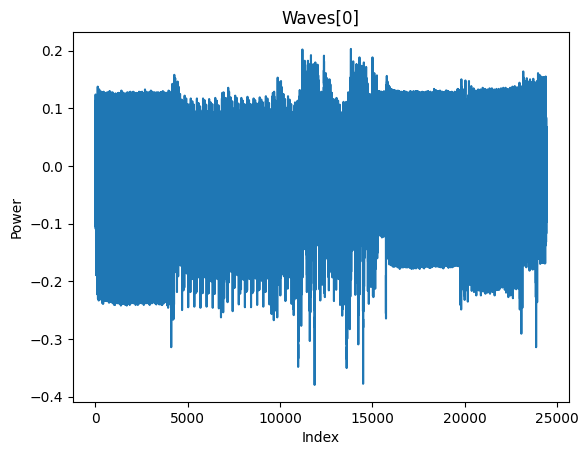

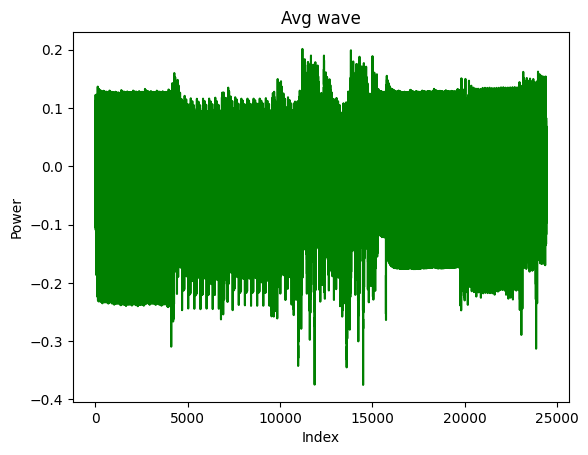

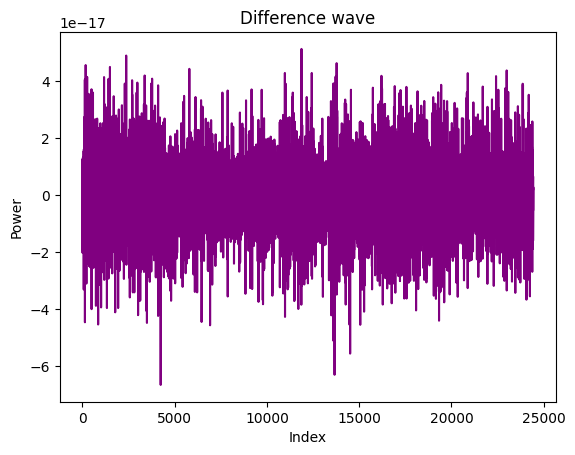

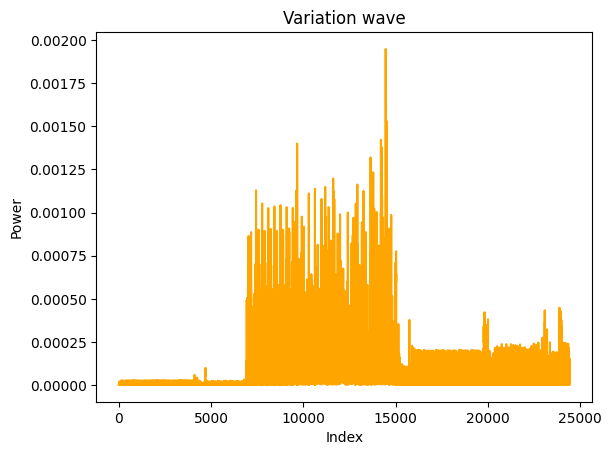

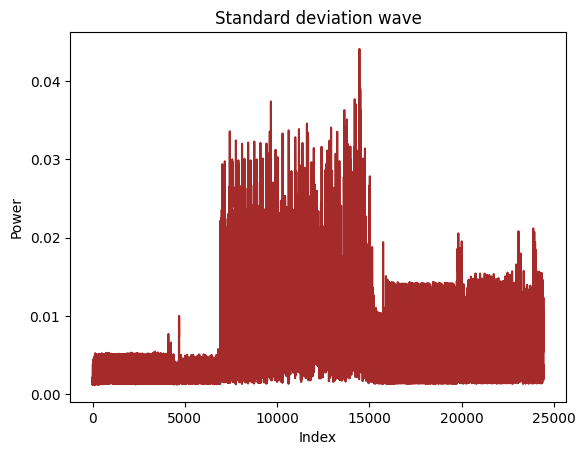

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

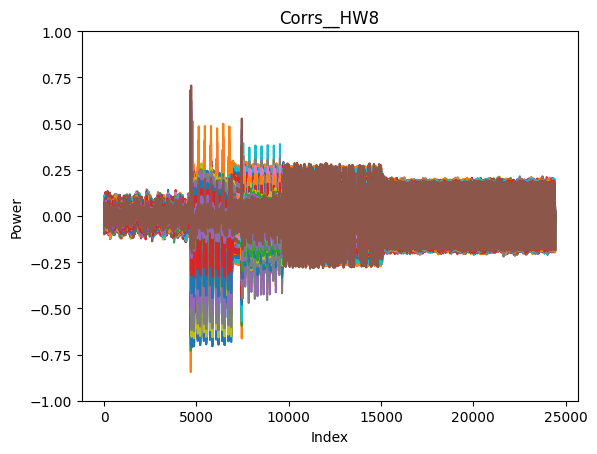

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

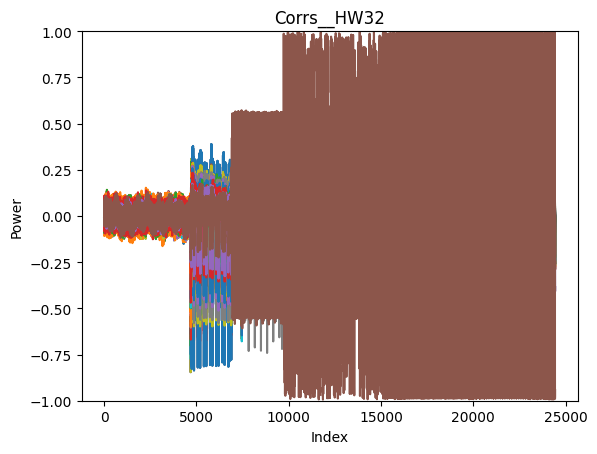

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

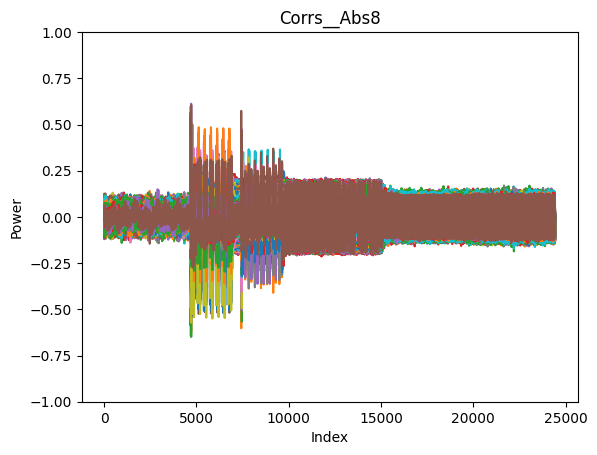

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

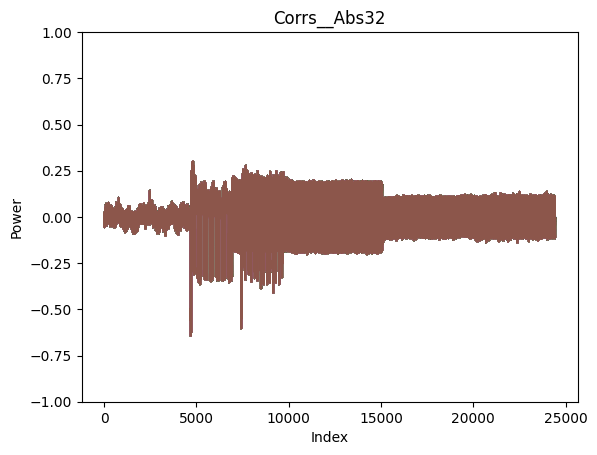

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

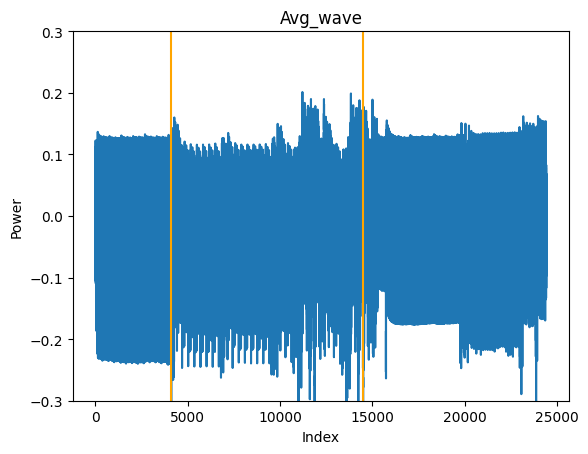

In [15]:
activity_borders = [4100, 14500]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.3,0.3], graph_title="Avg_wave", ylabel="Power", borders = activity_borders)

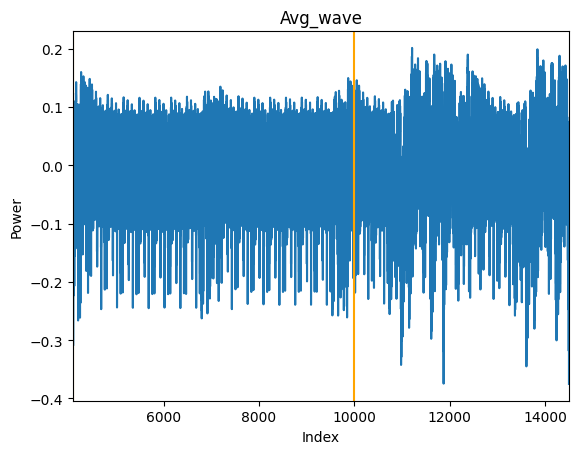

In [17]:
prev_borders = next_borders
layer_borders = [4100, 10000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[activity_borders[0],activity_borders[1]], graph_title="Avg_wave",
                  ylabel="Power", borders = layer_borders)

#### SPA of neuron's 1. layer

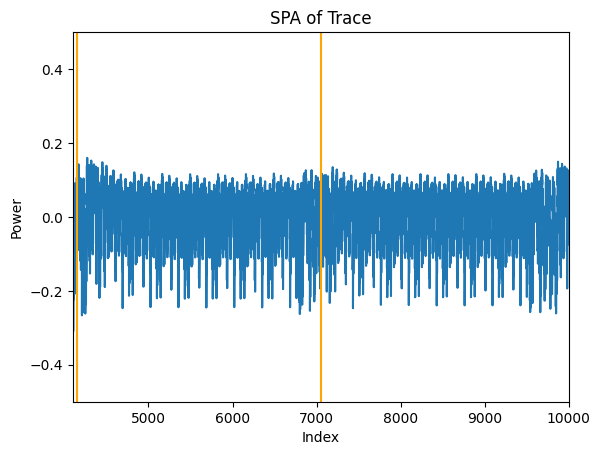

In [19]:
prev_borders = next_borders
neuron_borders = [4150, 7050]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[layer_borders[0],layer_borders[1]], ylim=[-0.5,0.5], graph_title="SPA of Trace",
          ylabel="Power", borders = neuron_borders)
offset = next_borders[1] - next_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

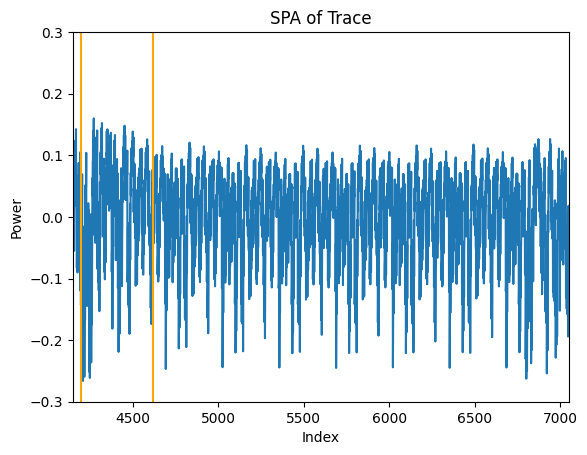

In [20]:
prev_borders = next_borders
mult_borders = [4200, 4620]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[neuron_borders[0],neuron_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = mult_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

[ 45  70   4 120 104 255  43   0 207  41 180 216 167  63 241   0 116 115
 205  58]


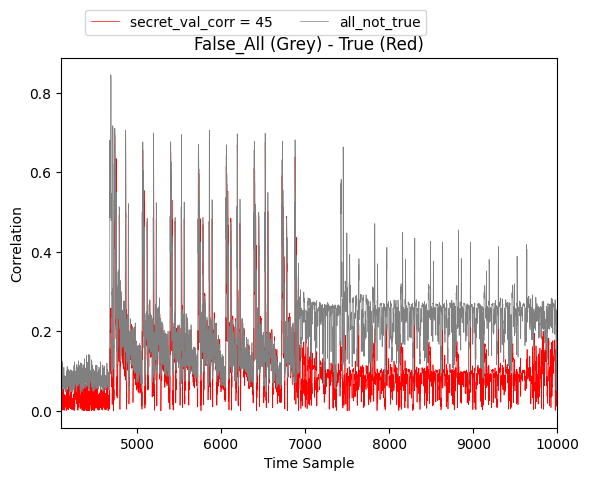

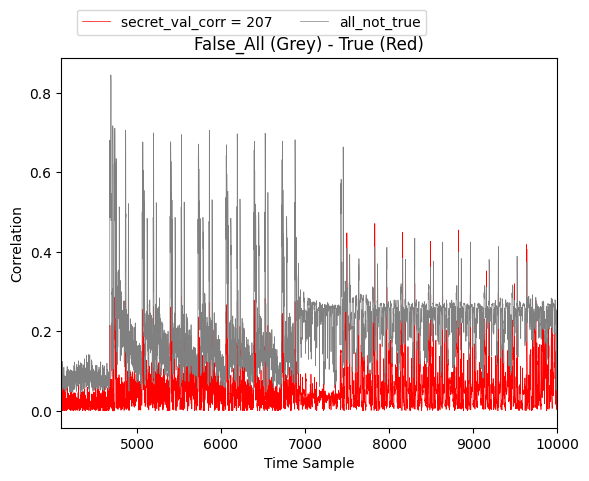

In [22]:
prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 45, xlim=[4100, 10000], true_last = False, saveName = f'CPA_mult_level_secret[{45}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 207, xlim=[4100, 10000], true_last = False, saveName = f'CPA_mult_level_secret[{207}]')

### CPA

##### CPA, weight extraction - Abs8

Hello 45
Peak range: 0.3
24429
 Index of global max: 4714 and global_max_val: 0.6494795522189869


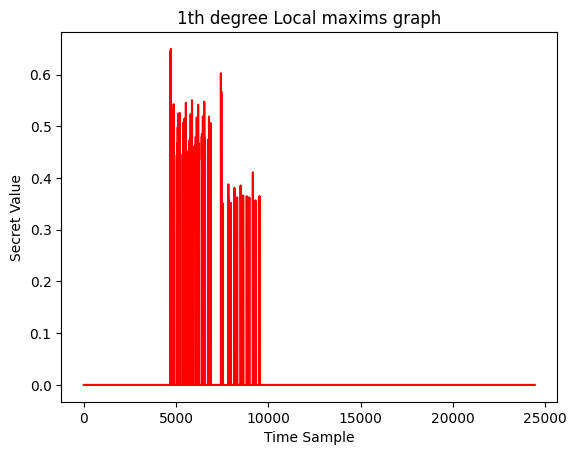

Number of uniques: 13
Number of local maxims: 244
Uniquess: [2, 1, 104, 208, 180, 45, 90, 160, 64, 255, 49, 207, 224]
Local maxims: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 104, 208, 208, 208, 208, 180, 180, 180, 180, 180, 180, 45, 45, 45, 104, 45, 90, 90, 45, 45, 208, 208, 208, 208, 208, 208, 160, 160, 160, 64, 208, 208, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 208, 208, 160, 160, 160, 208, 208, 208, 208, 180, 180, 180, 180, 180, 180, 90, 45, 45, 45, 45, 90, 45, 45, 90, 45, 90, 208, 160, 208, 208, 208, 208, 160, 160, 160, 208, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 208, 208, 160, 160, 208, 208, 208, 208, 208, 208, 180, 180, 180, 180, 208, 180, 45, 45, 45, 45, 90, 45, 160, 160, 208, 208, 208, 208, 160, 160, 160, 208, 208, 208, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 90, 90, 208, 208, 208, 208, 208, 208, 160, 160, 160, 208, 208, 208, 208, 180, 18

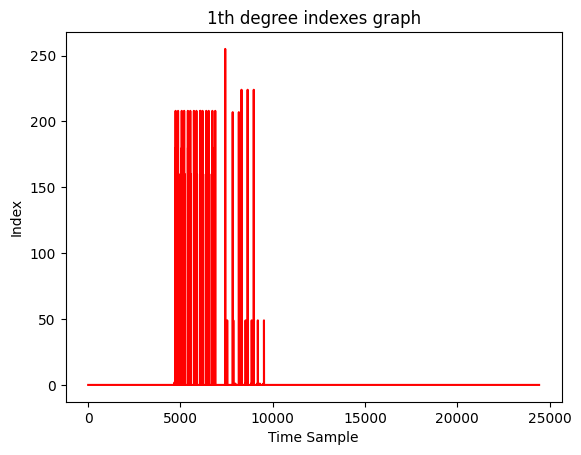

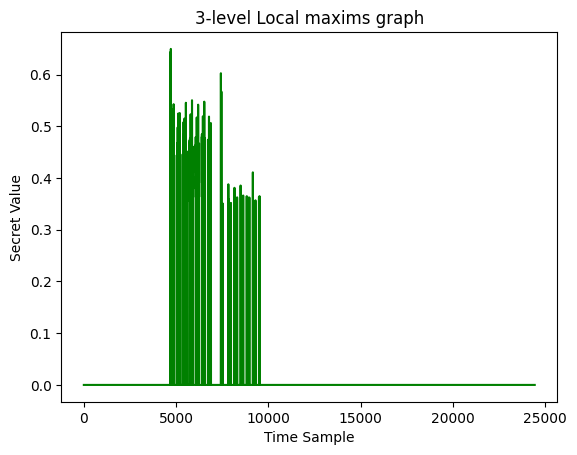

Number of uniques: 13
Number of local maxims: 317
Uniquess: [2, 1, 104, 208, 180, 45, 90, 160, 64, 255, 49, 207, 224]
Local maxims: [2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 104, 104, 208, 208, 208, 208, 208, 208, 208, 208, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 104, 45, 90, 90, 45, 45, 45, 208, 208, 208, 208, 208, 208, 208, 208, 160, 160, 160, 160, 208, 64, 208, 208, 208, 180, 180, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 208, 208, 160, 160, 160, 160, 208, 208, 208, 208, 208, 208, 208, 180, 208, 180, 180, 180, 180, 180, 180, 180, 90, 45, 45, 45, 45, 90, 45, 45, 90, 90, 45, 90, 208, 208, 160, 208, 208, 208, 208, 208, 160, 160, 160, 160, 208, 208, 160, 208, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 208, 208, 160, 160, 160, 208, 208, 208, 208, 208, 208, 208, 208, 208, 180, 180, 180, 180, 180, 208, 180, 45, 45, 45, 45, 90

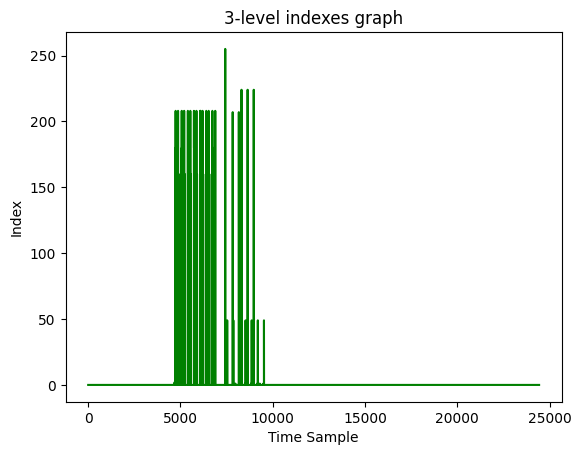

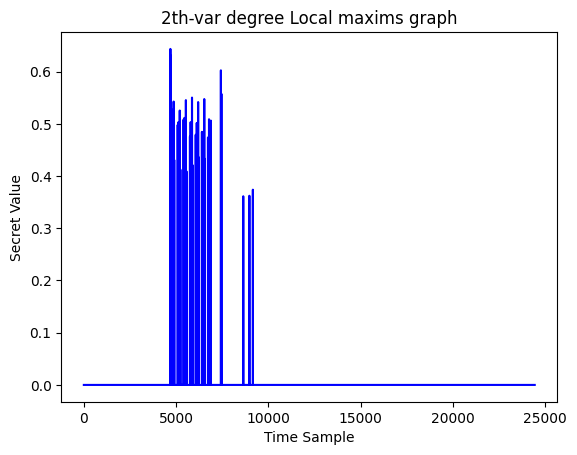

Number of uniques: 8
Number of local maxims: 34
Uniquess: [1, 2, 208, 90, 160, 45, 180, 224]
Local maxims: [1, 2, 208, 90, 208, 160, 45, 45, 208, 160, 180, 45, 208, 160, 45, 45, 208, 160, 208, 45, 208, 160, 180, 45, 208, 160, 208, 45, 208, 1, 2, 224, 224, 1]


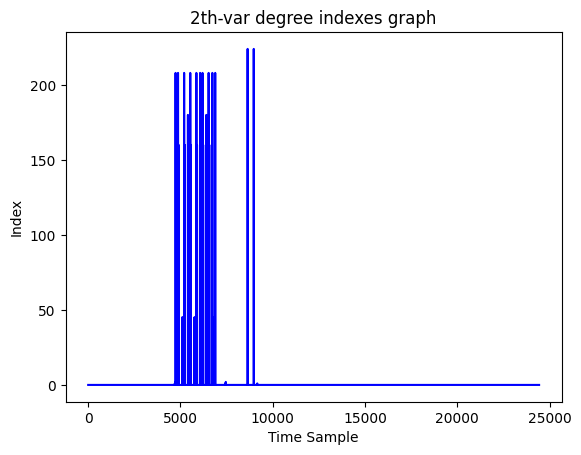

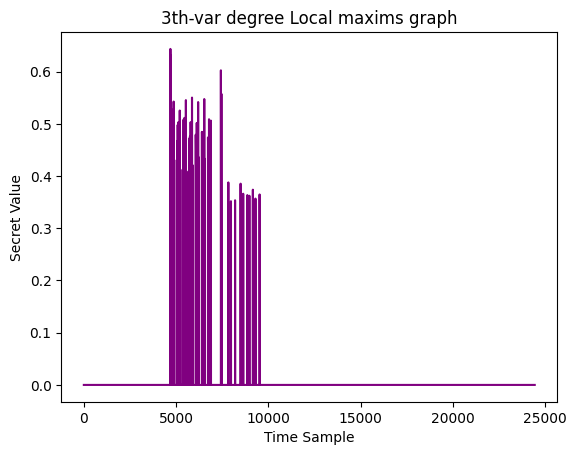

Number of uniques: 11
Number of local maxims: 158
Uniquess: [2, 1, 208, 180, 45, 104, 90, 160, 207, 49, 224]
Local maxims: [2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 208, 208, 180, 180, 180, 45, 45, 45, 104, 90, 90, 45, 45, 208, 208, 208, 208, 160, 160, 208, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 160, 160, 208, 180, 180, 180, 180, 45, 45, 45, 90, 45, 90, 45, 90, 208, 208, 208, 208, 160, 160, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 208, 208, 208, 160, 208, 208, 208, 180, 180, 180, 208, 45, 45, 45, 90, 45, 208, 208, 208, 208, 160, 160, 208, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 90, 90, 208, 208, 208, 208, 160, 160, 208, 180, 180, 180, 180, 180, 45, 45, 45, 45, 45, 45, 45, 160, 208, 208, 208, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 207, 1, 49, 1, 1, 224, 49, 224, 1, 1, 49]


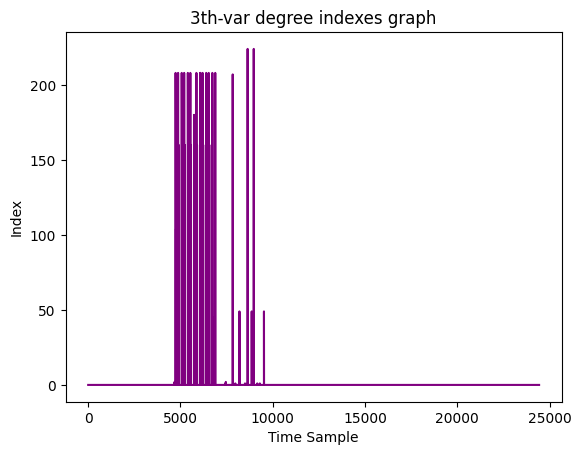

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4690, with correlation secret_corr = 0.643


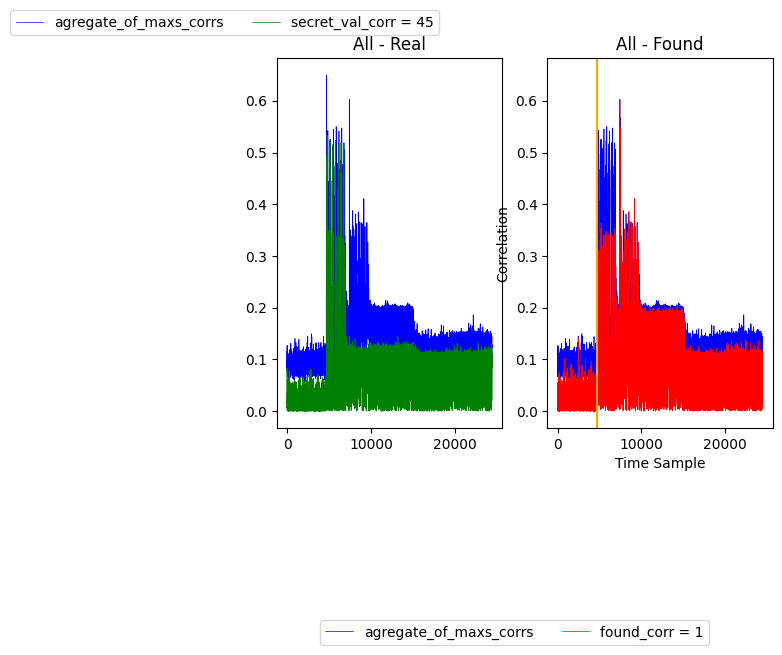

Hello 70
In range 4703 - 24429
 Found the soonest secret value is 2, at the time sample 4715, with correlation secret_corr = 0.630


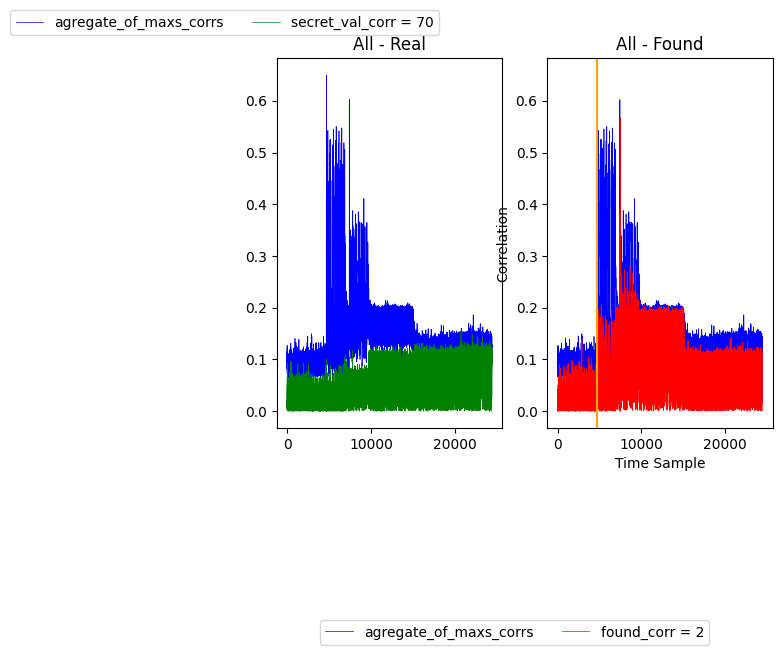

Hello 4
In range 4724 - 24429
 Found the soonest secret value is 208, at the time sample 4734, with correlation secret_corr = 0.529


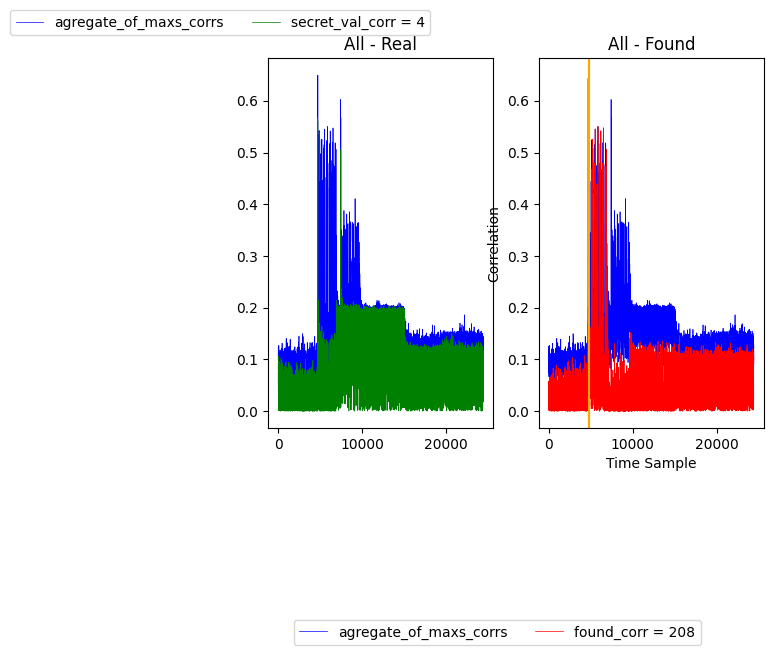

Hello 120
In range 4762 - 24429
 Found the soonest secret value is 90, at the time sample 4790, with correlation secret_corr = 0.521


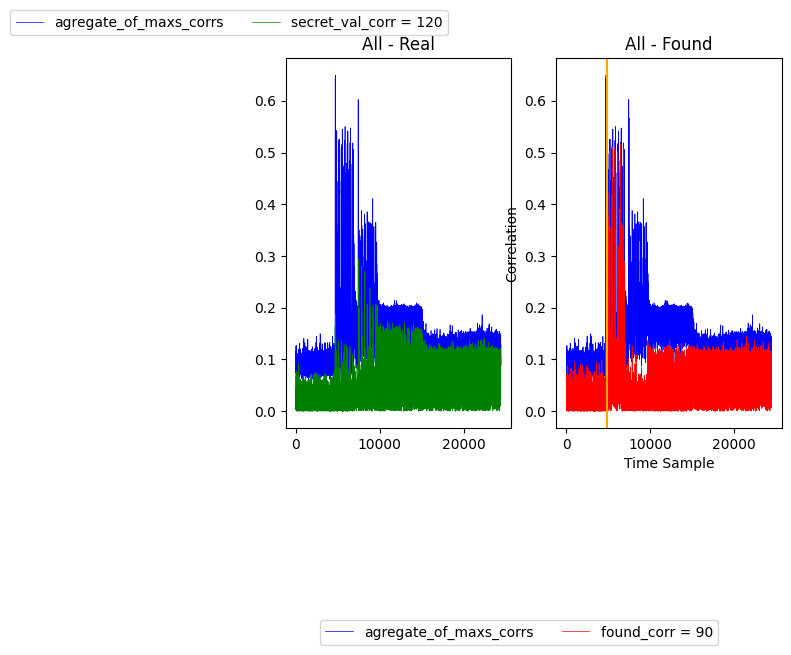

Hello 104
In range 4828 - 24429
 Found the soonest secret value is 208, at the time sample 4866, with correlation secret_corr = 0.543


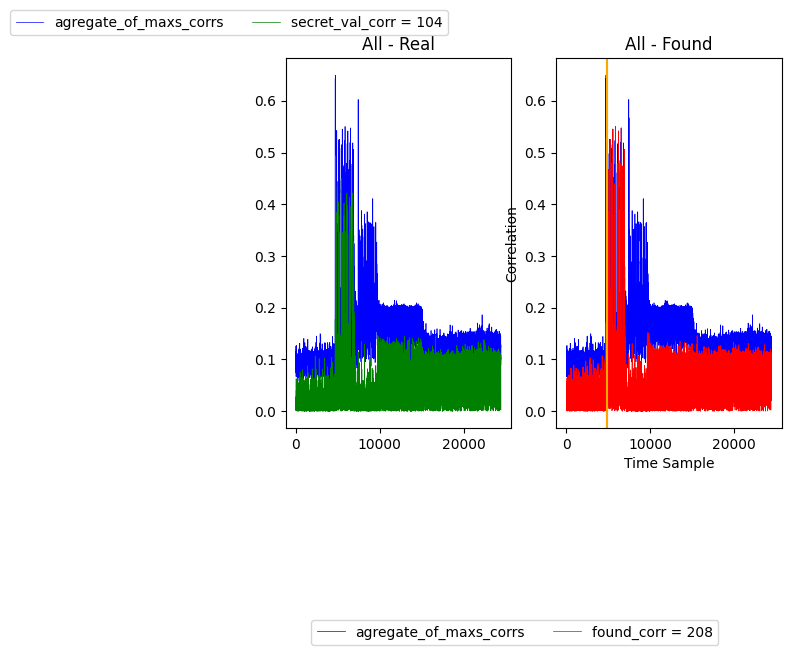

Hello 255
In range 4883 - 24429
 Found the soonest secret value is 160, at the time sample 4899, with correlation secret_corr = 0.431


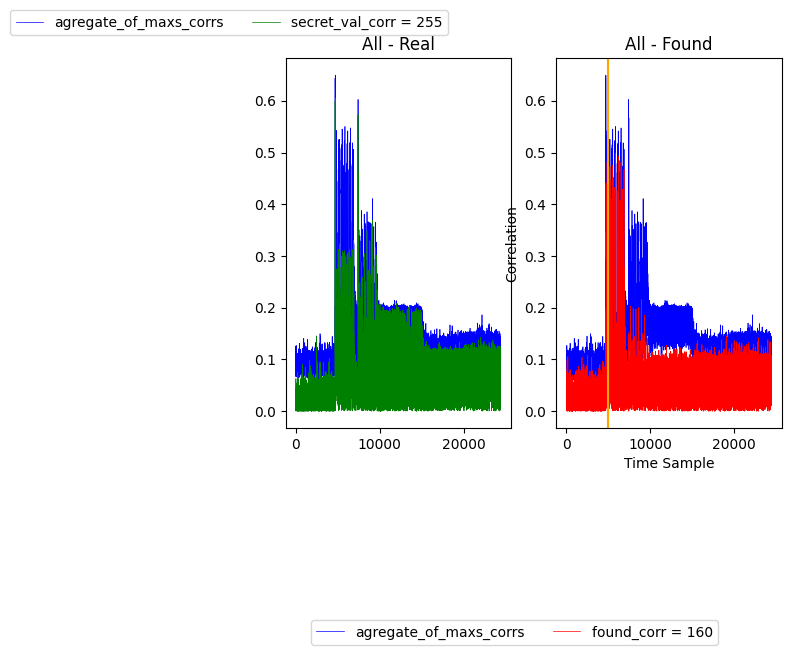

Hello 43
In range 4992 - 24429
 Found the soonest secret value is 45, at the time sample 5085, with correlation secret_corr = 0.498


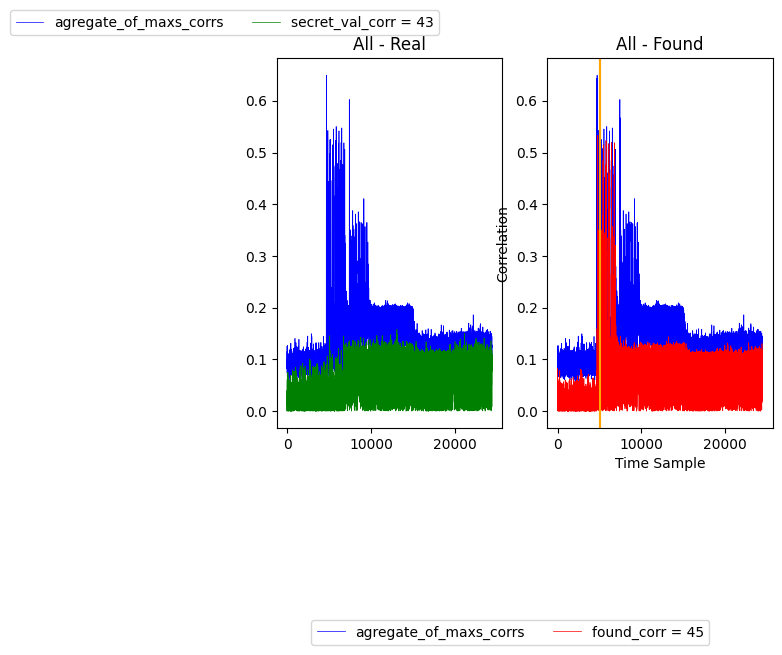

Hello 0
In range 5104 - 24429
 Found the soonest secret value is 45, at the time sample 5122, with correlation secret_corr = 0.503


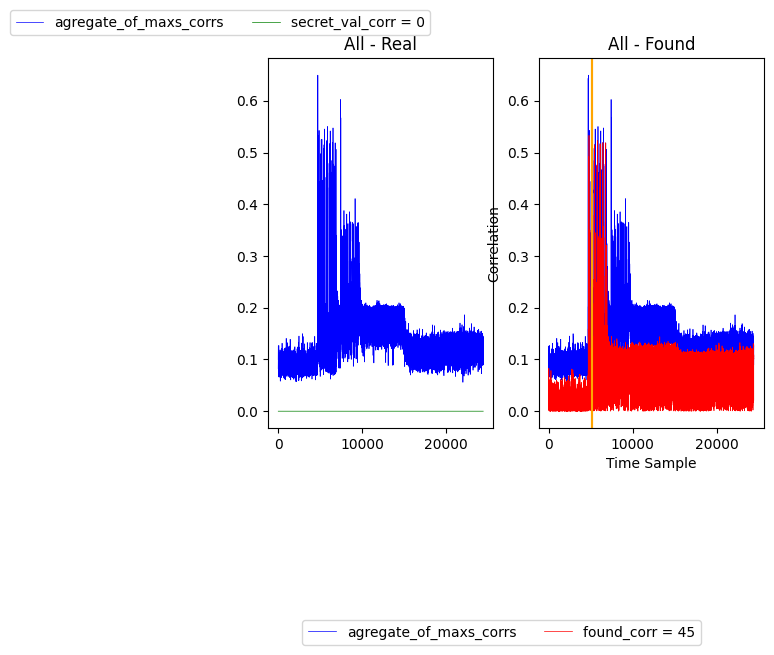

Hello 207
In range 5159 - 24429
 Found the soonest secret value is 208, at the time sample 5197, with correlation secret_corr = 0.526


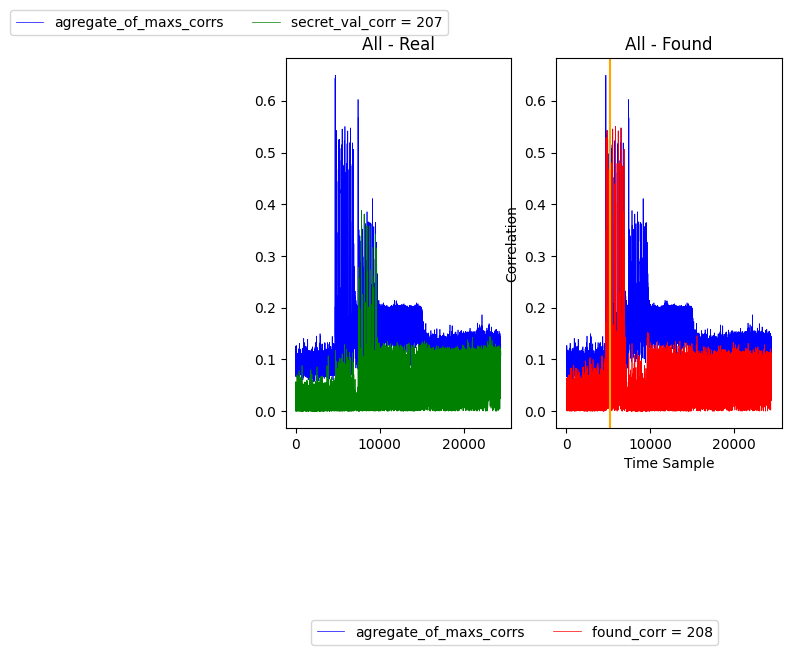

Hello 41
In range 5214 - 24429
 Found the soonest secret value is 160, at the time sample 5231, with correlation secret_corr = 0.412


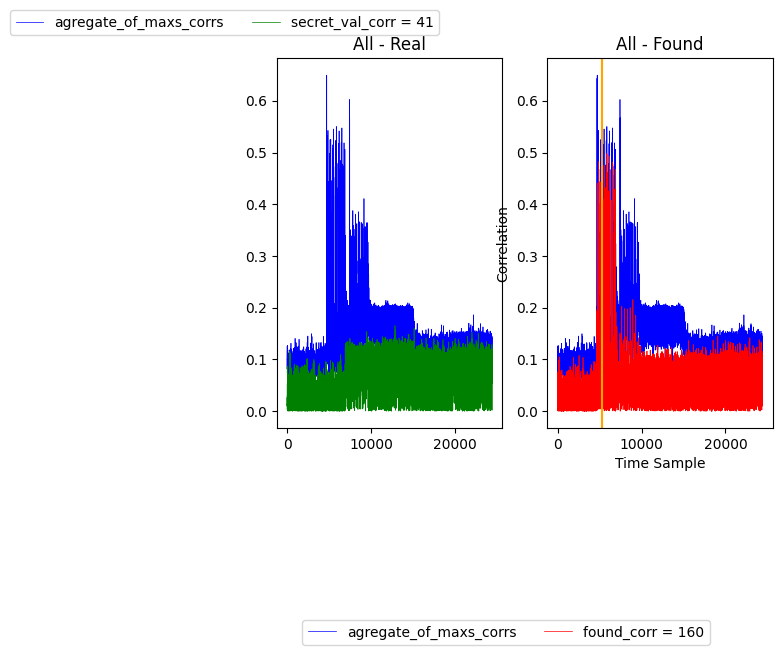

Hello 180
In range 5317 - 24429
 Found the soonest secret value is 180, at the time sample 5403, with correlation secret_corr = 0.508


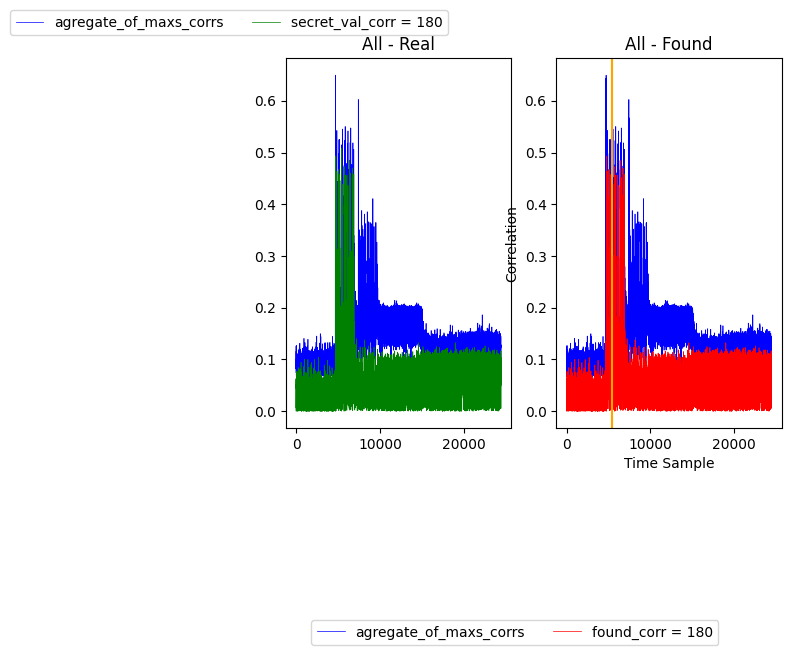

Hello 216
In range 5428 - 24429
 Found the soonest secret value is 45, at the time sample 5454, with correlation secret_corr = 0.511


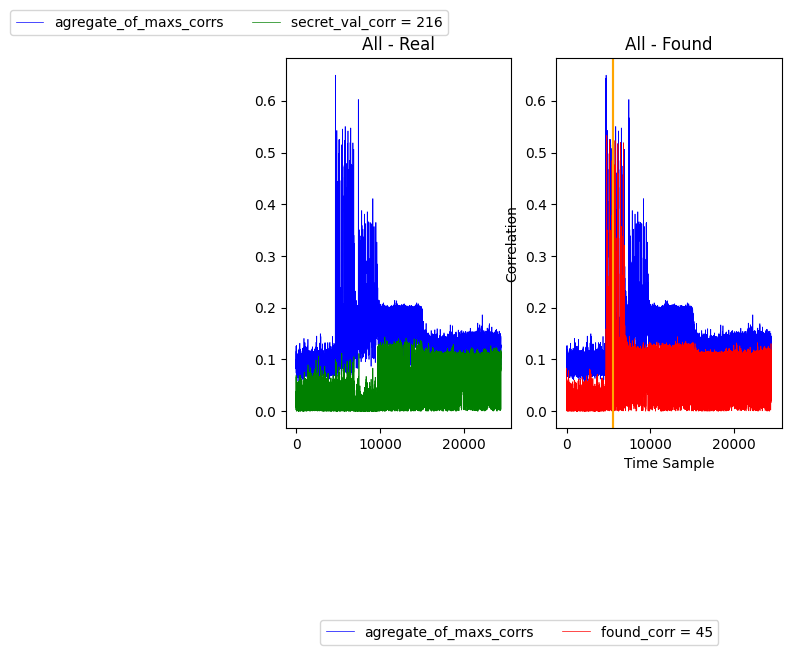

In [10]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 45
Peak range: 0.3
24429
 Index of global max: 4690 and global_max_val: 0.6434931434537341


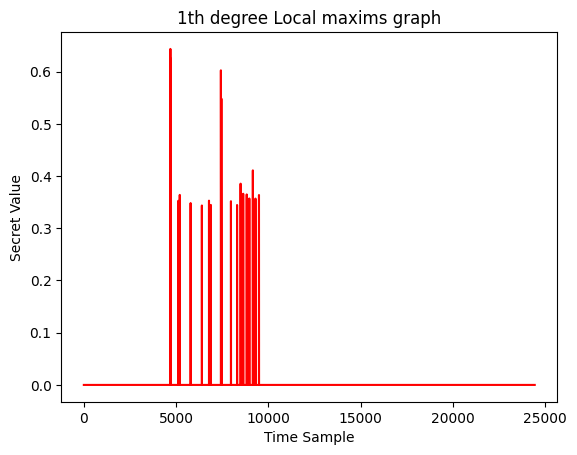

Number of uniques: 22
Number of local maxims: 48
Uniquess: [225, 165, 209, 155, 95, 243, 15, 27, 5, 9, 121, 25, 31, 151, 173, 149, 115, 65, 39, 3, 153, 71]
Local maxims: [225, 165, 209, 225, 155, 95, 243, 15, 27, 5, 9, 225, 121, 25, 27, 27, 5, 225, 31, 15, 151, 5, 5, 173, 149, 25, 225, 243, 5, 27, 31, 5, 155, 115, 225, 5, 5, 25, 65, 39, 3, 153, 27, 31, 71, 225, 225, 31]


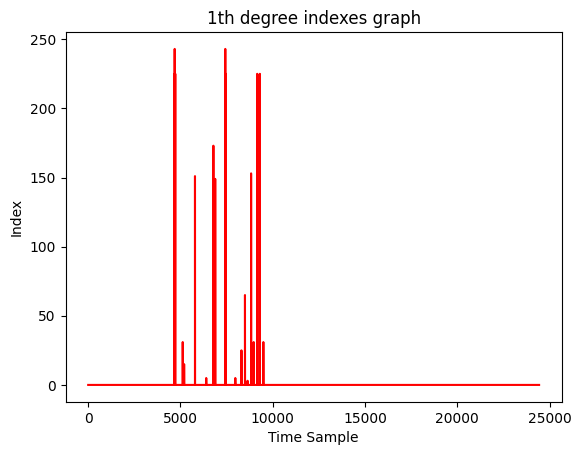

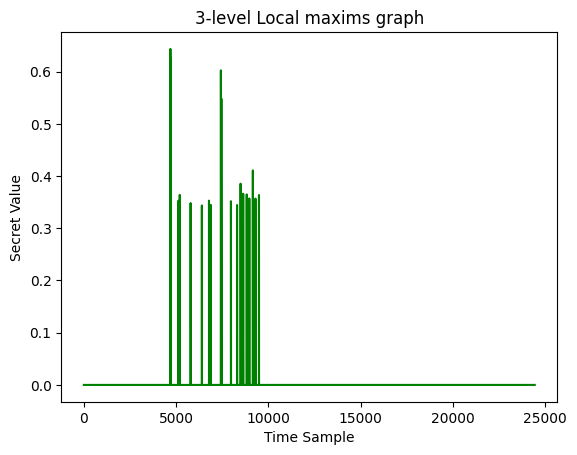

Number of uniques: 25
Number of local maxims: 60
Uniquess: [225, 165, 209, 37, 155, 95, 27, 243, 15, 23, 65, 5, 9, 121, 25, 31, 151, 173, 149, 115, 39, 33, 3, 153, 71]
Local maxims: [225, 165, 209, 37, 225, 155, 95, 27, 243, 15, 27, 23, 65, 5, 9, 225, 225, 121, 25, 27, 27, 5, 225, 31, 15, 151, 5, 5, 173, 149, 9, 225, 225, 225, 25, 225, 243, 5, 27, 31, 5, 155, 115, 225, 5, 5, 25, 65, 39, 33, 3, 153, 27, 225, 31, 71, 225, 5, 225, 31]


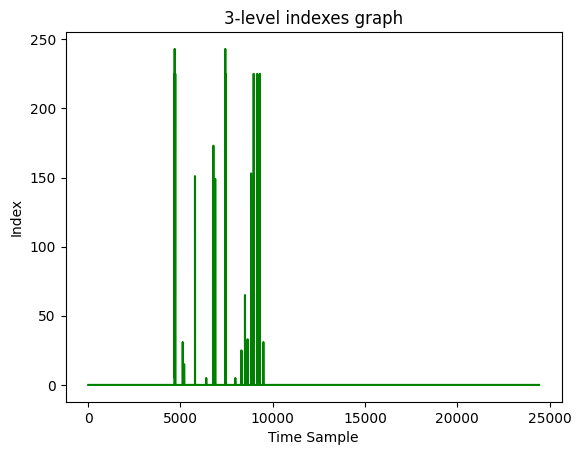

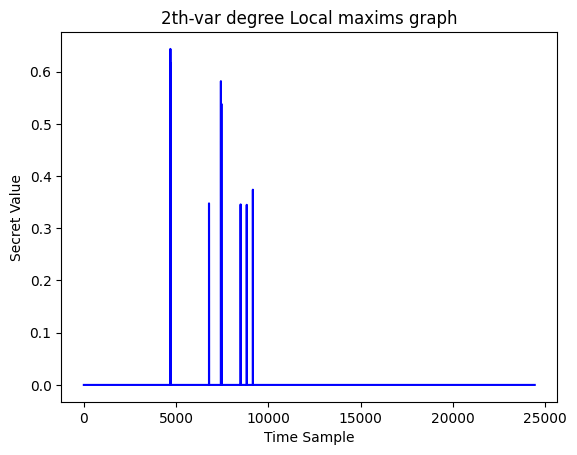

Number of uniques: 6
Number of local maxims: 8
Uniquess: [5, 27, 173, 225, 115, 39]
Local maxims: [5, 27, 173, 225, 115, 39, 27, 225]


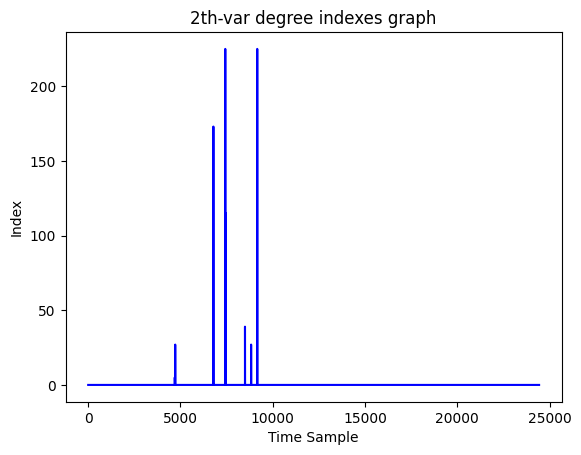

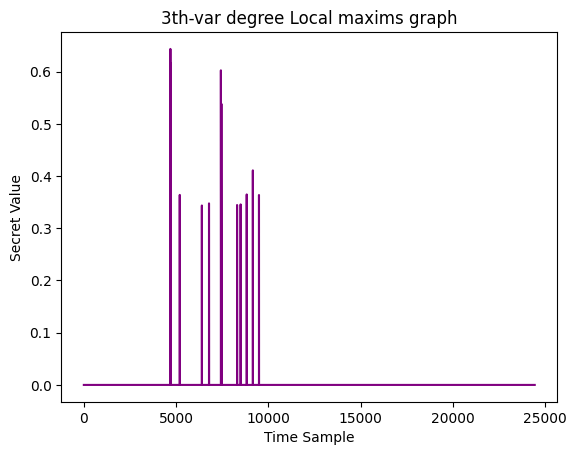

Number of uniques: 15
Number of local maxims: 33
Uniquess: [225, 165, 155, 243, 15, 5, 9, 27, 173, 25, 31, 115, 39, 153, 71]
Local maxims: [225, 165, 225, 155, 243, 15, 5, 9, 225, 27, 27, 5, 225, 15, 5, 173, 25, 225, 243, 5, 27, 31, 5, 115, 225, 5, 25, 39, 153, 27, 71, 225, 31]


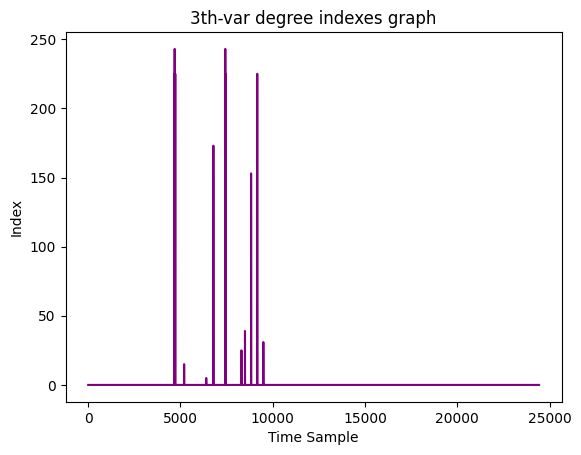

In range 0 - 24429
 Found the soonest secret value is 5, at the time sample 4690, with correlation secret_corr = 0.643


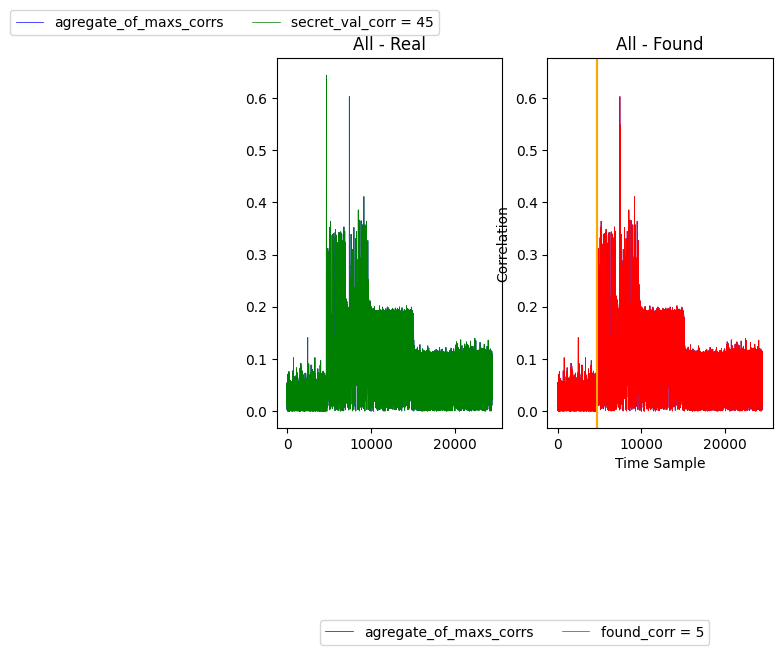

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 27, at the time sample 4714, with correlation secret_corr = 0.616


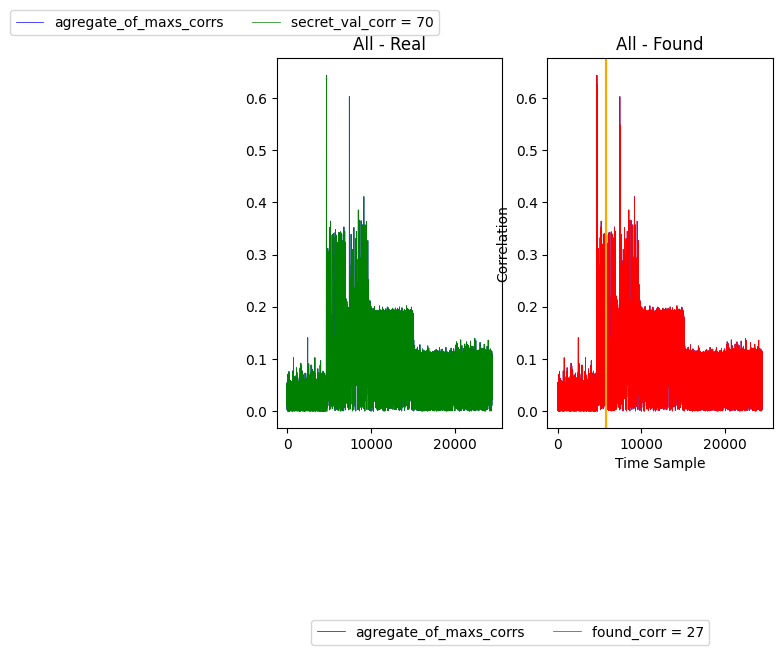

Hello 4
In range 5748 - 24429
 Found the soonest secret value is 173, at the time sample 6782, with correlation secret_corr = 0.348


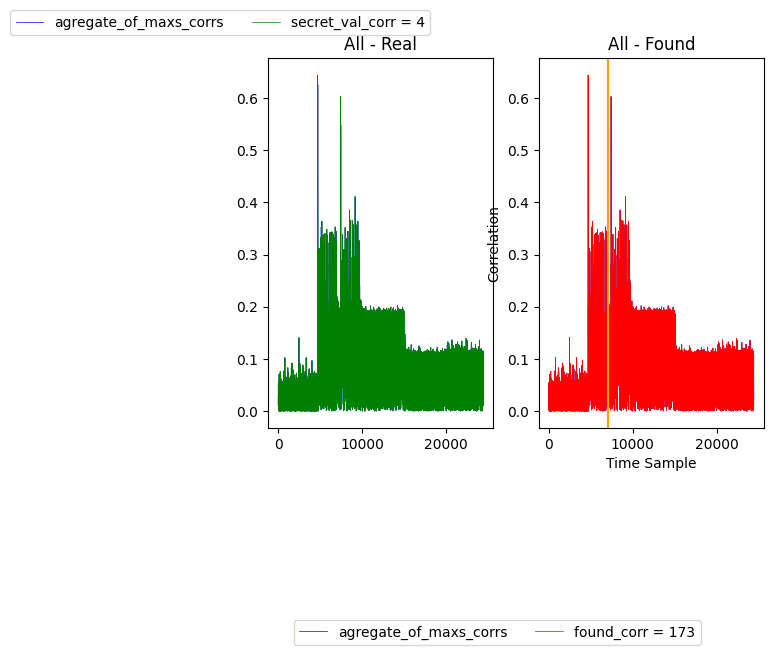

Hello 120
In range 7104 - 24429
 Found the soonest secret value is 225, at the time sample 7426, with correlation secret_corr = 0.582


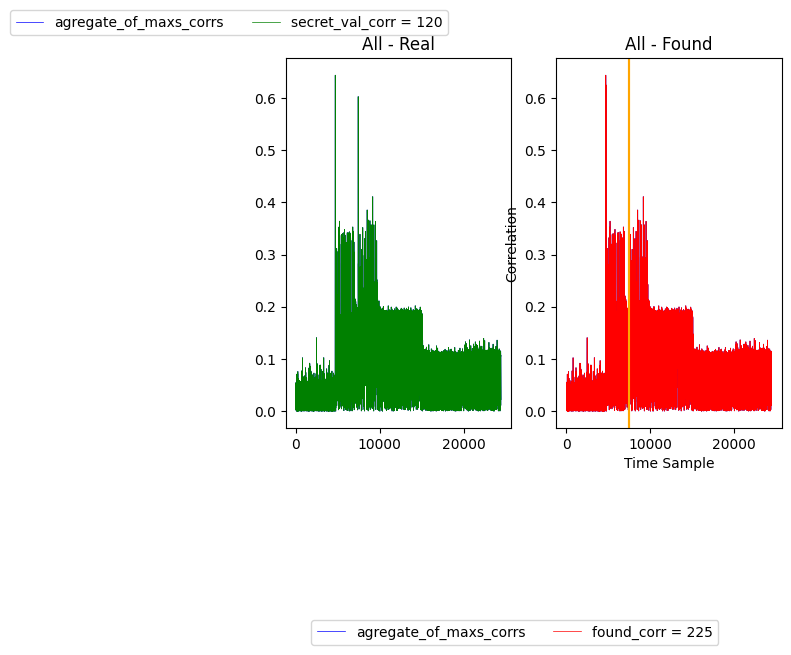

Hello 104
In range 7440 - 24429
 Found the soonest secret value is 115, at the time sample 7454, with correlation secret_corr = 0.538


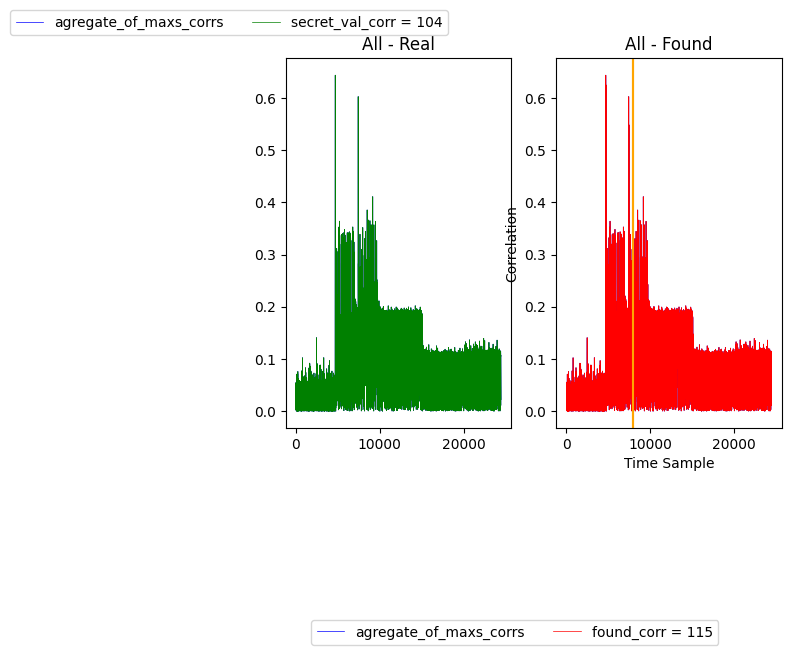

Hello 255
In range 7974 - 24429
 Found the soonest secret value is 39, at the time sample 8494, with correlation secret_corr = 0.346


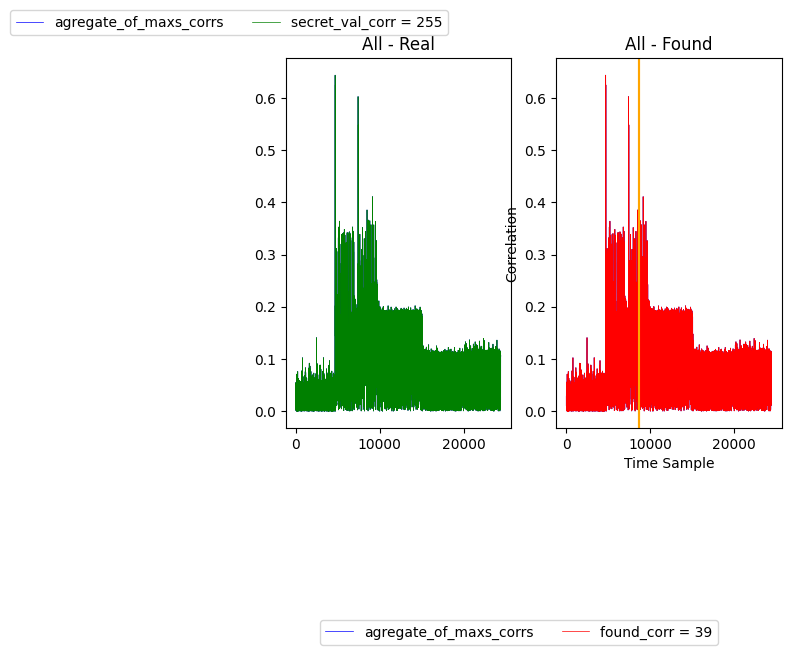

Hello 43
In range 8660 - 24429
 Found the soonest secret value is 27, at the time sample 8826, with correlation secret_corr = 0.345


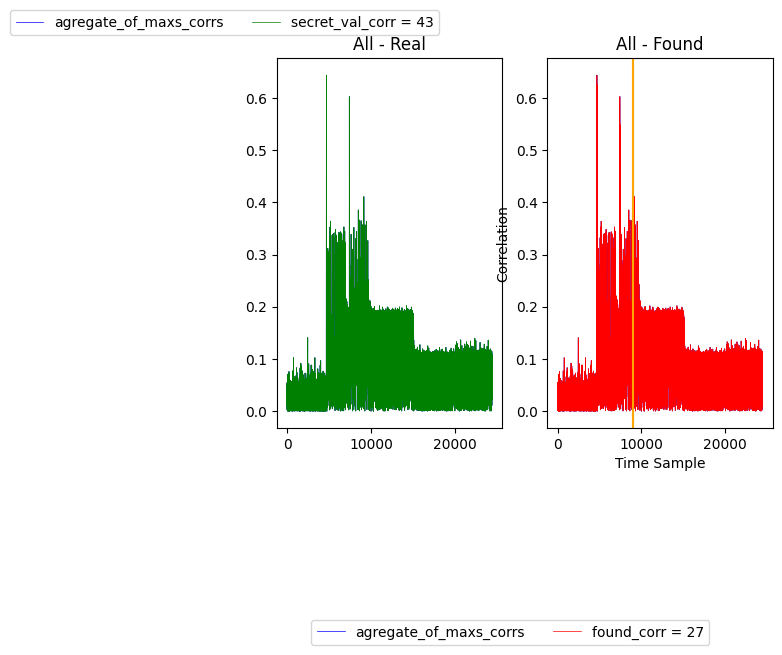

Hello 0
In range 8992 - 24429
 Found the soonest secret value is 225, at the time sample 9158, with correlation secret_corr = 0.374


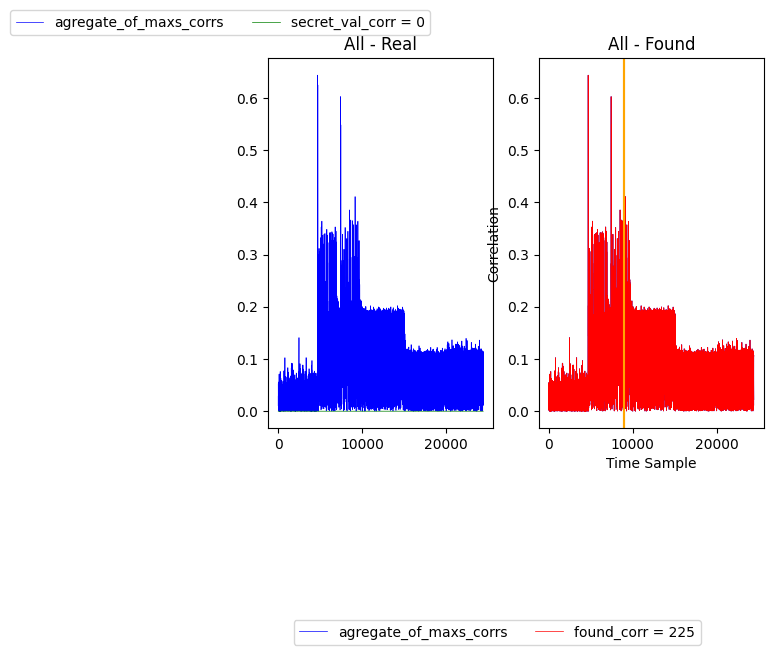

Hello 207
In range 8992 - 24429
 Found the soonest secret value is 225, at the time sample 9158, with correlation secret_corr = 0.374


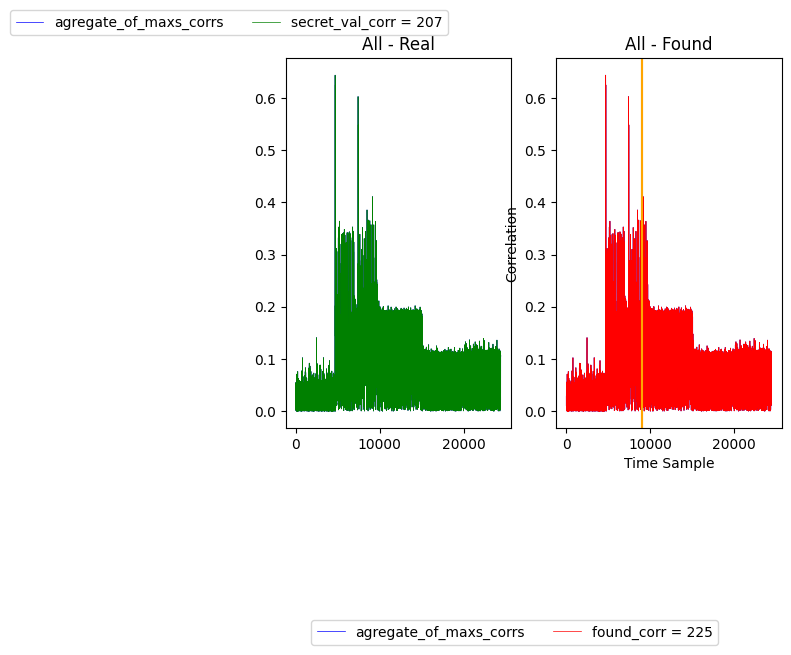

Hello 41
In range 8992 - 24429
 Found the soonest secret value is 225, at the time sample 9158, with correlation secret_corr = 0.374


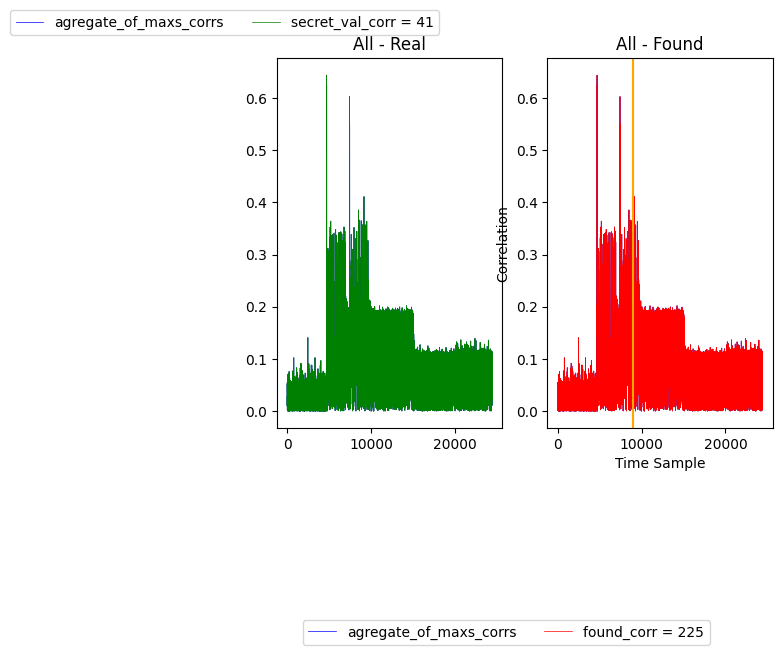

Hello 180
In range 8992 - 24429
 Found the soonest secret value is 225, at the time sample 9158, with correlation secret_corr = 0.374


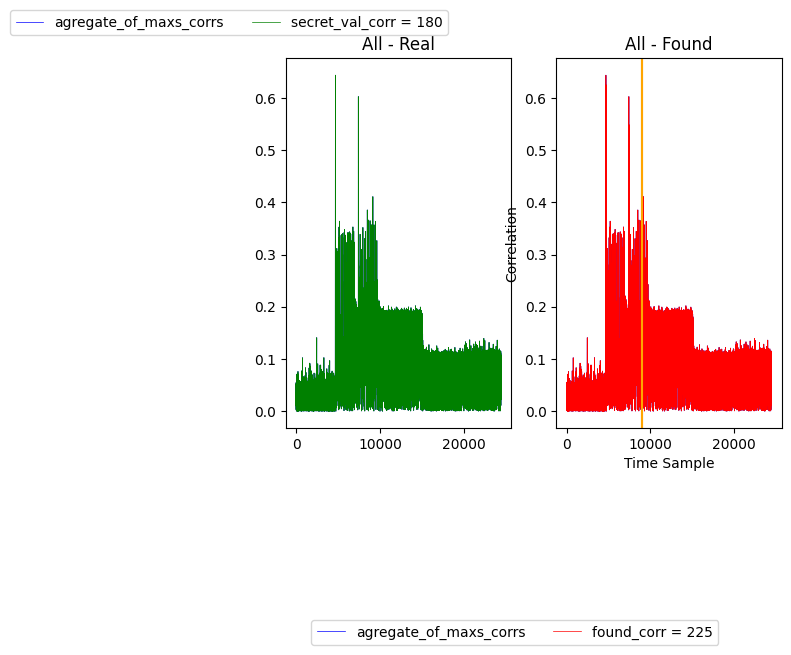

Hello 216
In range 8992 - 24429
 Found the soonest secret value is 225, at the time sample 9158, with correlation secret_corr = 0.374


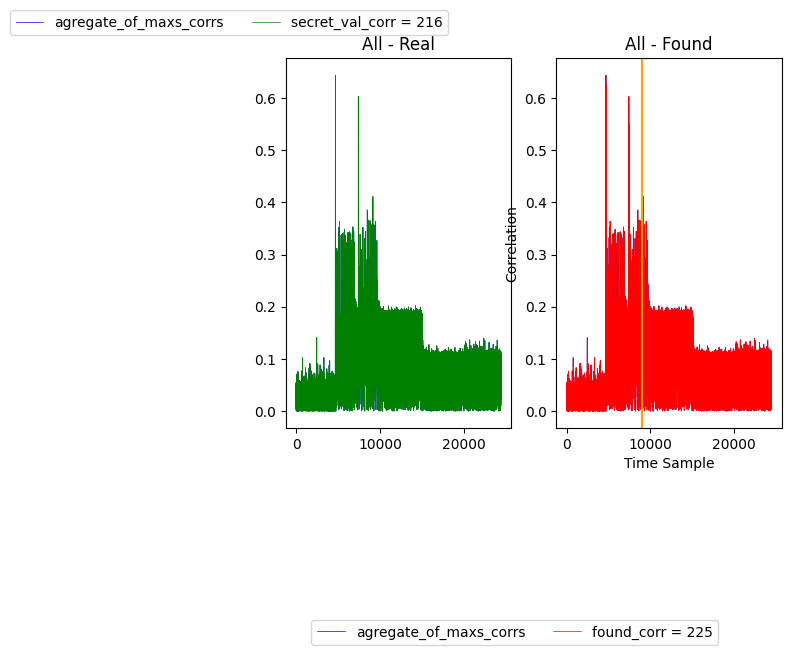

In [11]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 45
Peak range: 0.3
24429
 Index of global max: 14613 and global_max_val: 0.9984763659301906


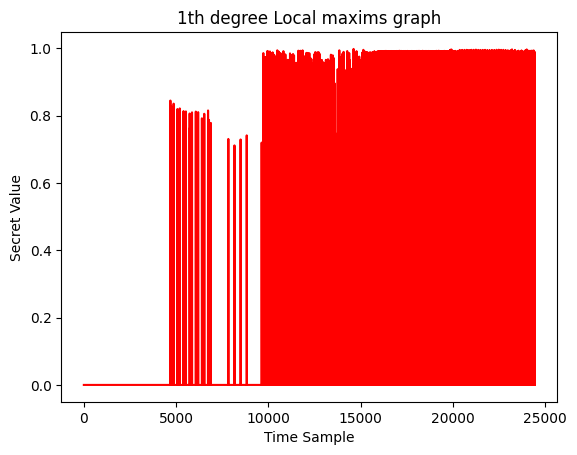

Number of uniques: 5
Number of local maxims: 5508
Uniquess: [1, 129, 45, 207, 255]
Local maxims: [1, 1, 1, 129, 129, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

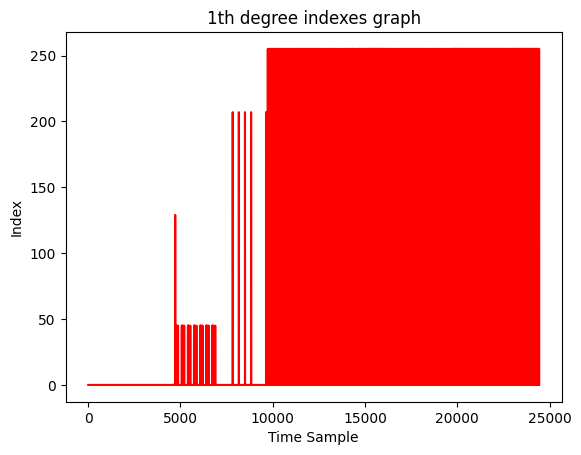

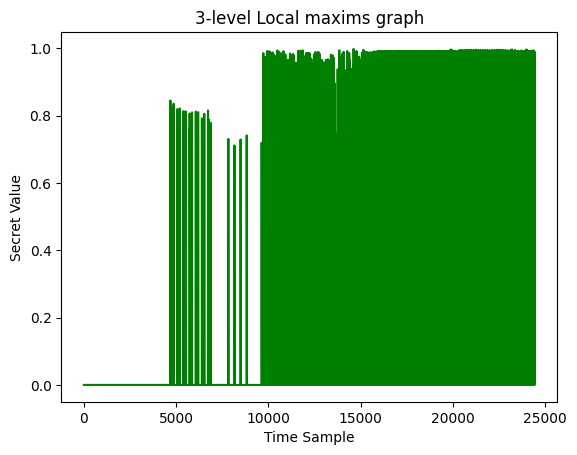

Number of uniques: 5
Number of local maxims: 8136
Uniquess: [1, 129, 45, 207, 255]
Local maxims: [1, 1, 1, 1, 129, 129, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

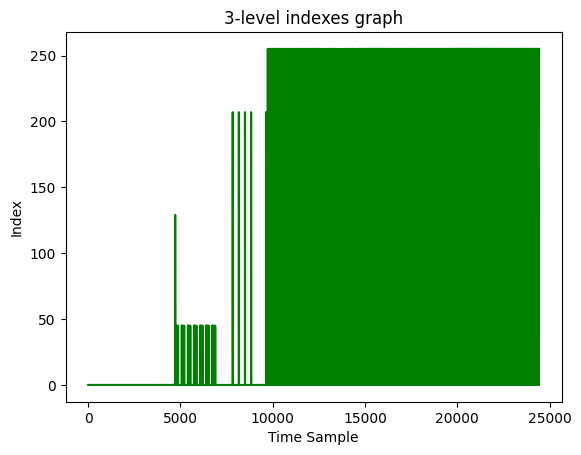

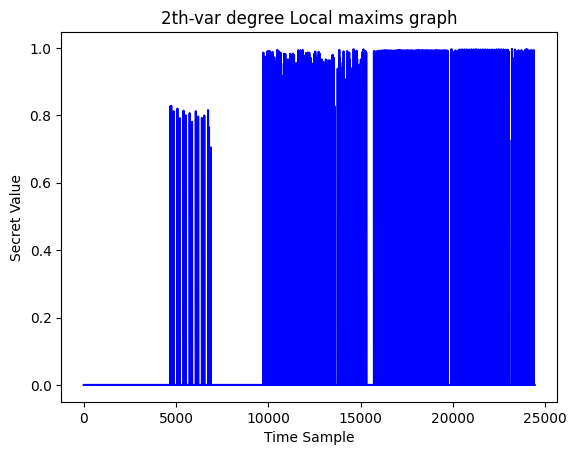

Number of uniques: 4
Number of local maxims: 489
Uniquess: [1, 129, 45, 255]
Local maxims: [1, 129, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

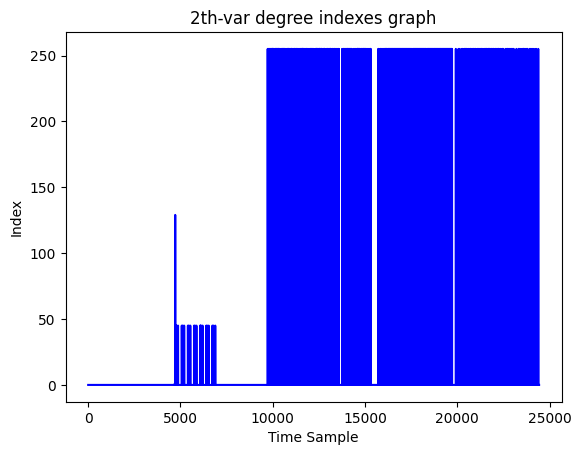

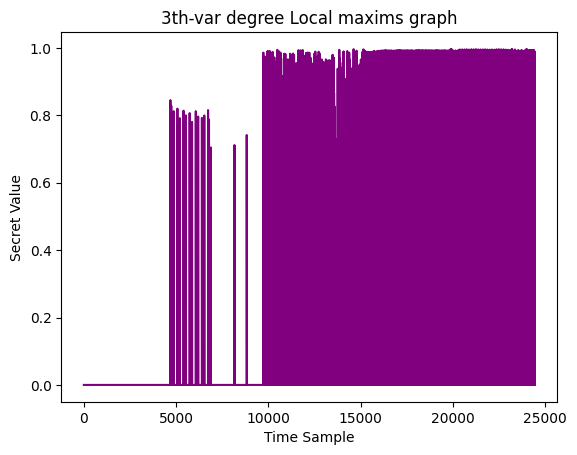

Number of uniques: 5
Number of local maxims: 3851
Uniquess: [1, 129, 45, 207, 255]
Local maxims: [1, 1, 1, 129, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

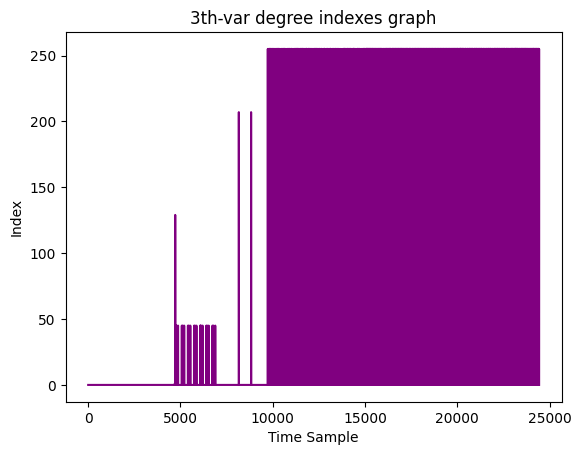

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4691, with correlation secret_corr = 0.827


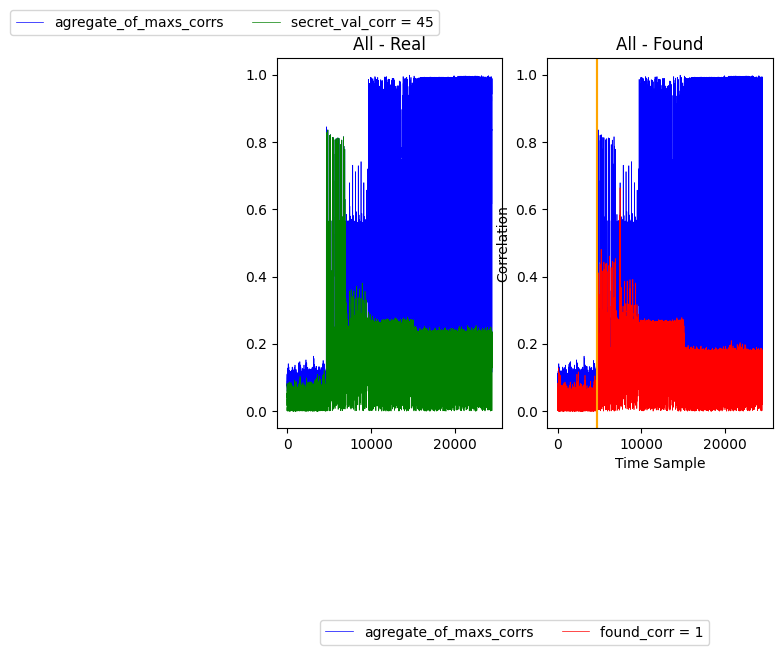

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 129, at the time sample 4714, with correlation secret_corr = 0.729


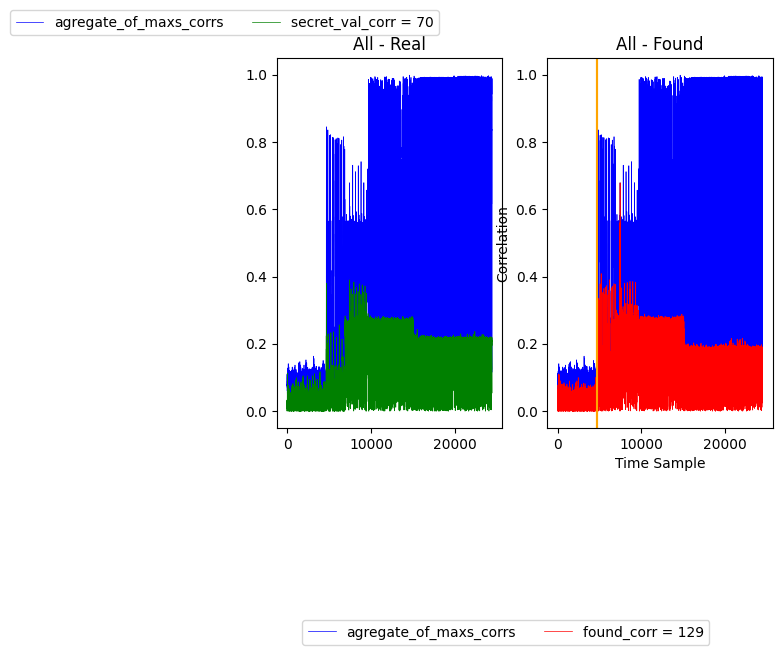

Hello 4
In range 4725 - 24429
 Found the soonest secret value is 45, at the time sample 4737, with correlation secret_corr = 0.828


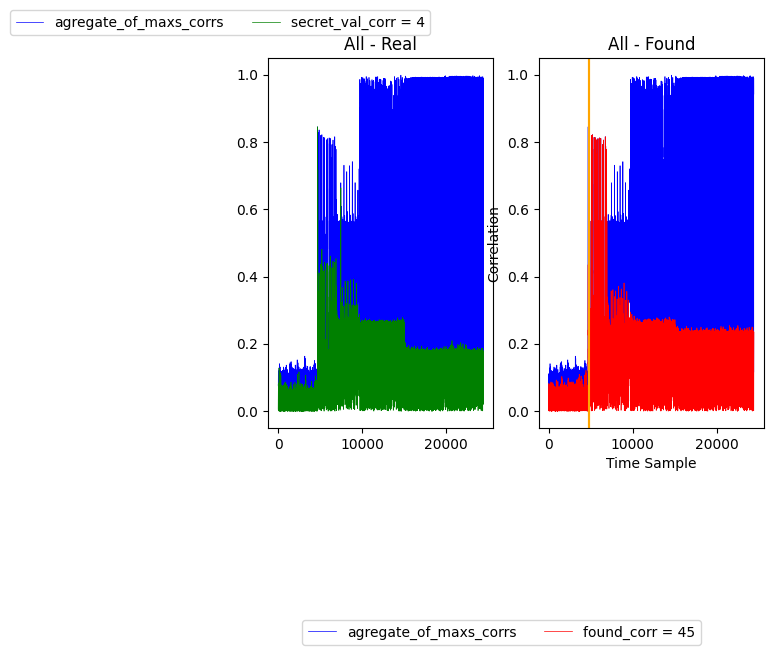

Hello 120
In range 4746 - 24429
 Found the soonest secret value is 45, at the time sample 4754, with correlation secret_corr = 0.710


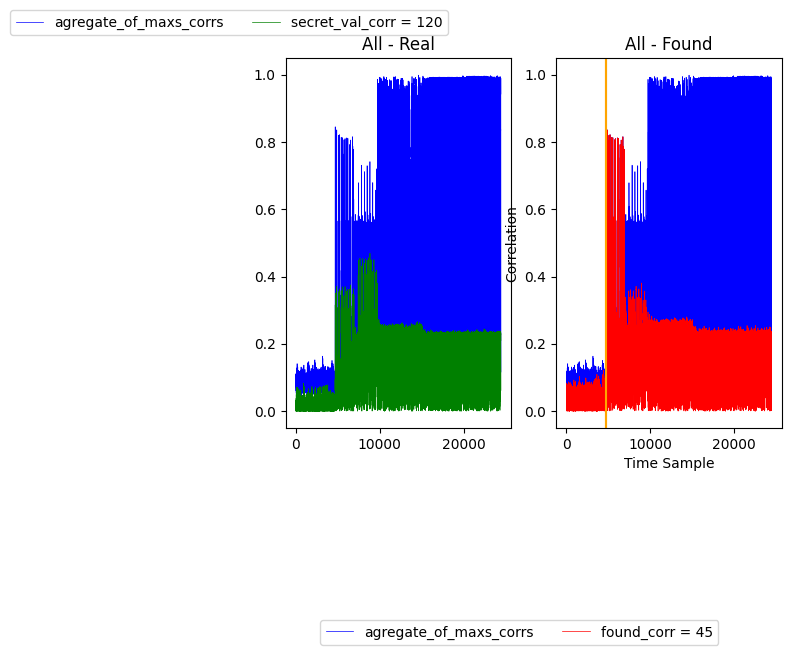

Hello 104
In range 4772 - 24429
 Found the soonest secret value is 45, at the time sample 4790, with correlation secret_corr = 0.744


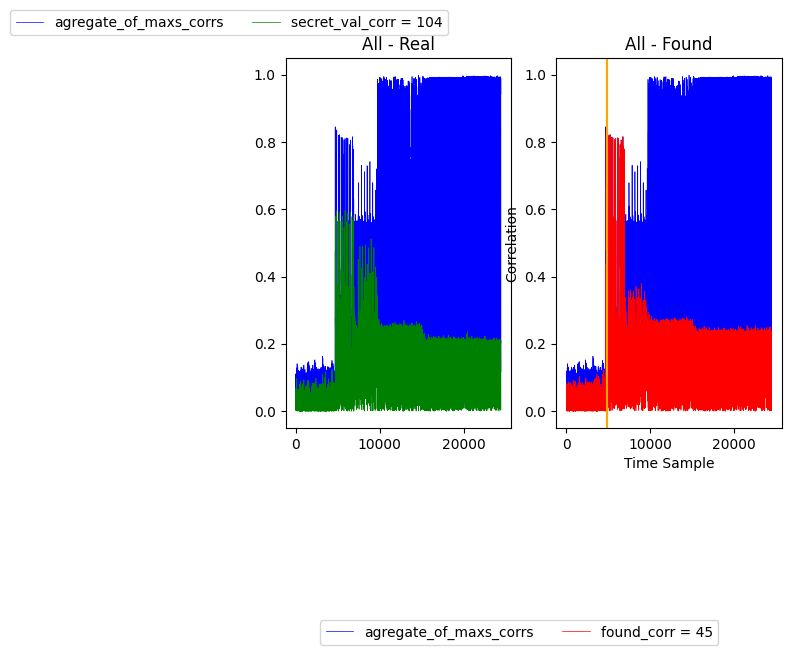

Hello 255
In range 4828 - 24429
 Found the soonest secret value is 45, at the time sample 4866, with correlation secret_corr = 0.812


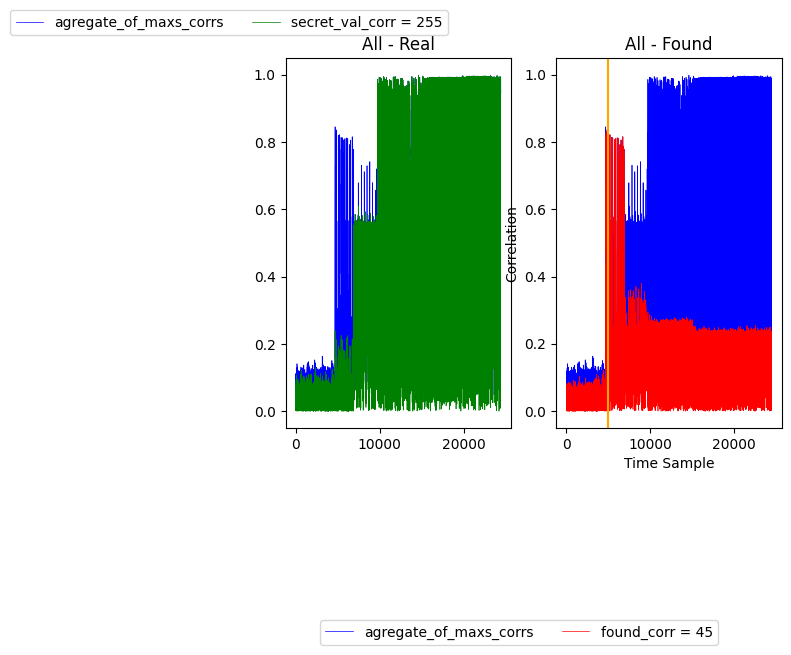

Hello 43
In range 4968 - 24429
 Found the soonest secret value is 45, at the time sample 5070, with correlation secret_corr = 0.820


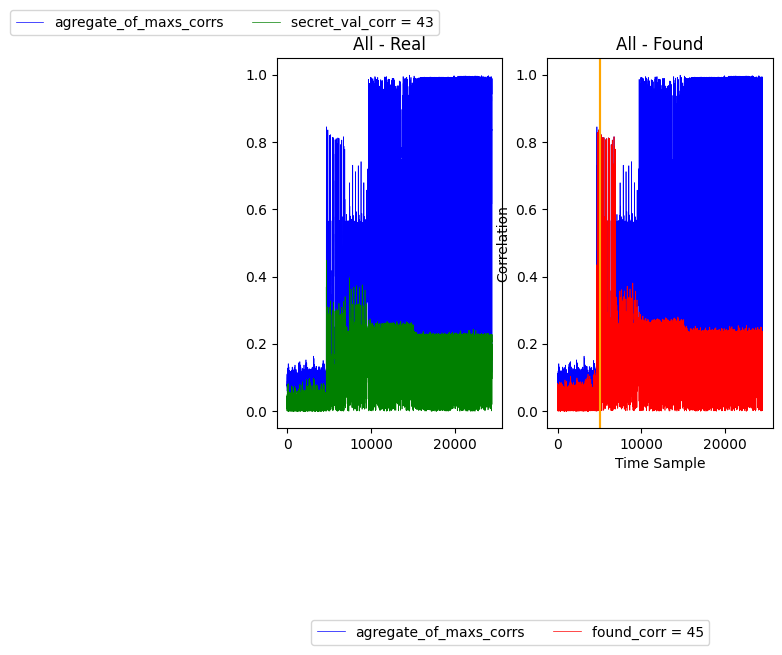

Hello 0
In range 5096 - 24429
 Found the soonest secret value is 45, at the time sample 5122, with correlation secret_corr = 0.742


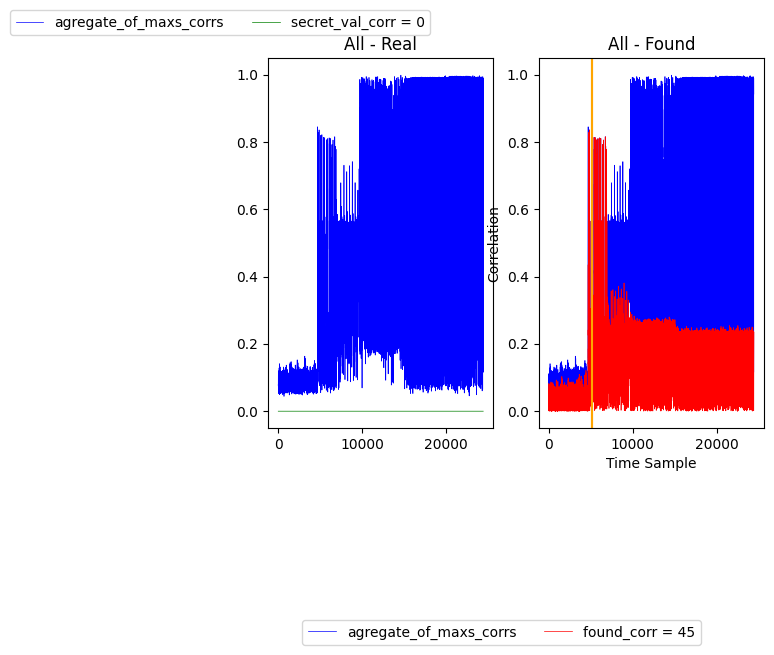

Hello 207
In range 5160 - 24429
 Found the soonest secret value is 45, at the time sample 5198, with correlation secret_corr = 0.792


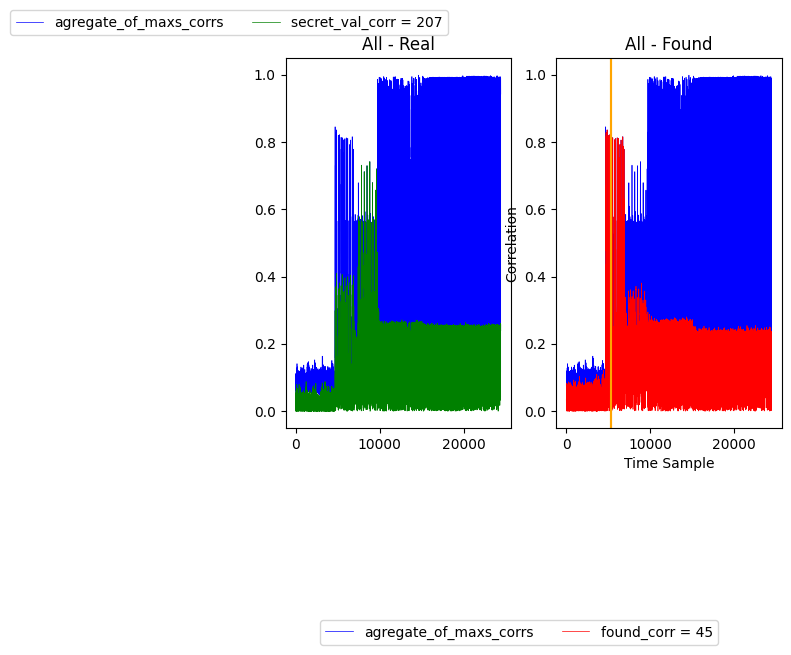

Hello 41
In range 5300 - 24429
 Found the soonest secret value is 45, at the time sample 5402, with correlation secret_corr = 0.814


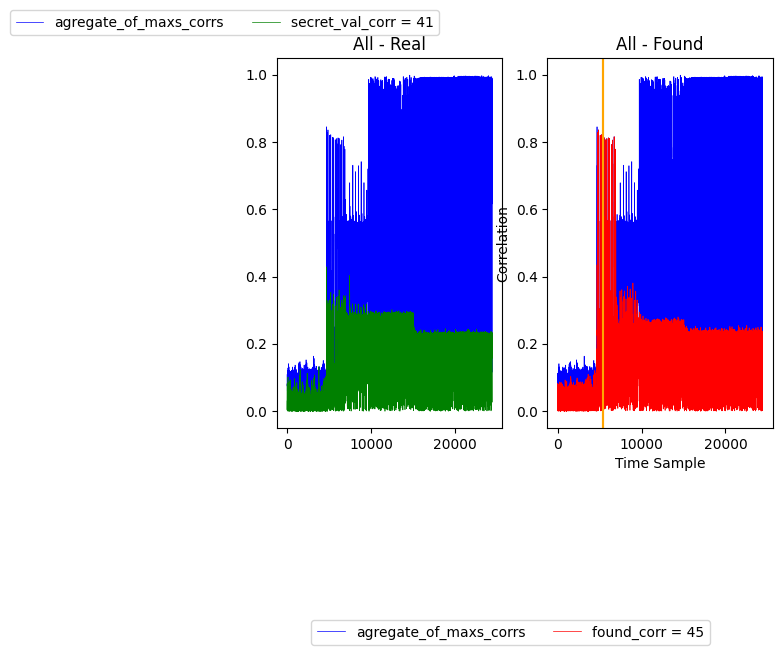

Hello 180
In range 5428 - 24429
 Found the soonest secret value is 45, at the time sample 5454, with correlation secret_corr = 0.761


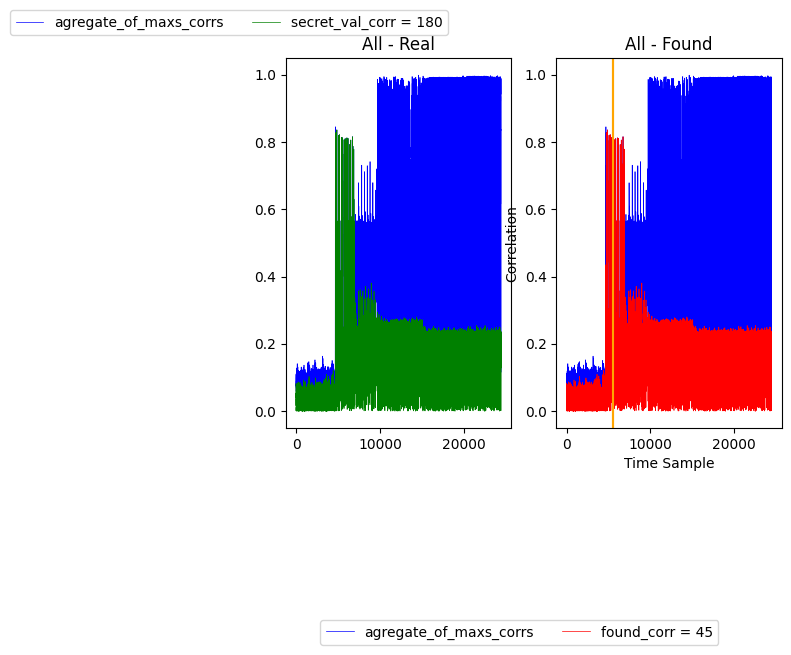

Hello 216
In range 5492 - 24429
 Found the soonest secret value is 45, at the time sample 5530, with correlation secret_corr = 0.800


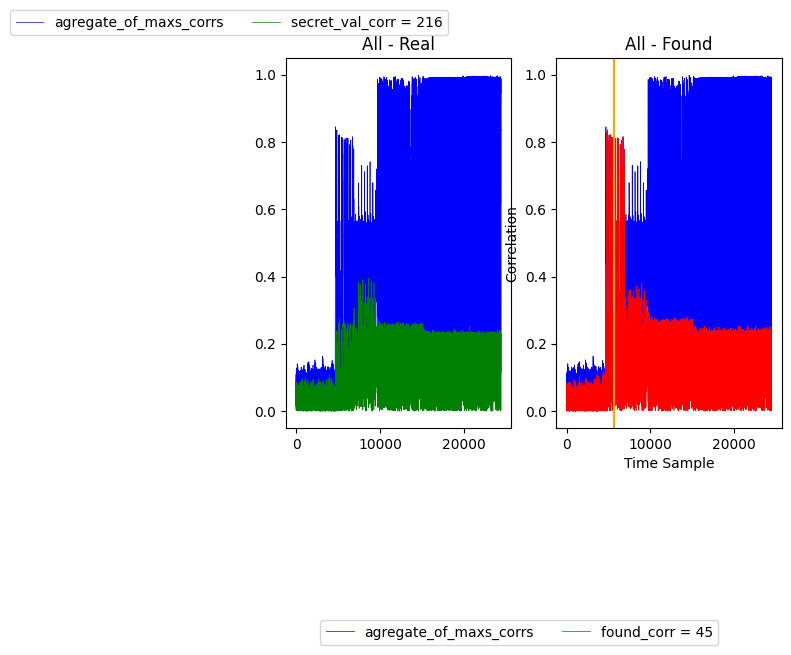

In [12]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 45
Peak range: 0.3
24429
 Index of global max: 4690 and global_max_val: 0.8450342880744803


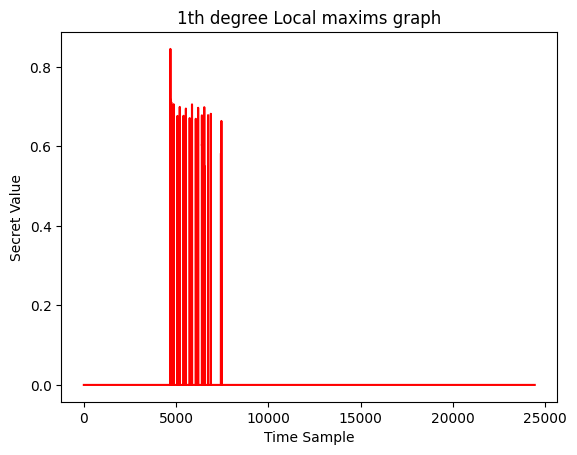

Number of uniques: 8
Number of local maxims: 94
Uniquess: [255, 1, 104, 180, 90, 45, 173, 160]
Local maxims: [255, 255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 255, 104, 104, 180, 90, 90, 90, 90, 90, 180, 45, 45, 90, 90, 90, 180, 180, 90, 90, 173, 180, 45, 90, 180, 90, 180, 90, 90, 90, 90, 90, 90, 180, 180, 90, 90, 180, 180, 90, 90, 90, 180, 180, 90, 180, 90, 90, 90, 90, 90, 90, 180, 45, 180, 180, 90, 180, 180, 90, 90, 90, 90, 180, 90, 90, 160, 180, 180, 180, 90, 90, 90, 180, 180, 180, 180, 1, 1, 1, 1, 1]


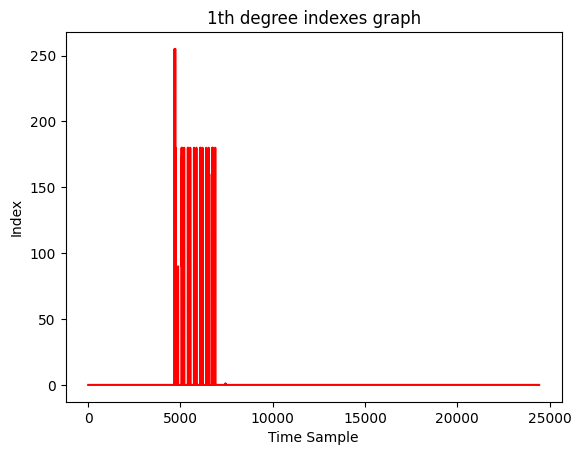

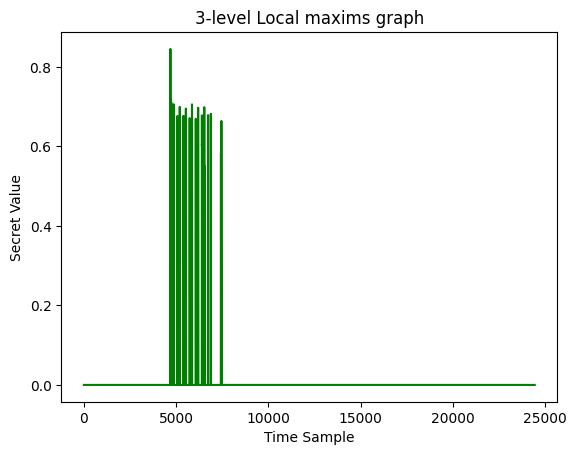

Number of uniques: 8
Number of local maxims: 110
Uniquess: [255, 1, 104, 180, 90, 45, 173, 160]
Local maxims: [255, 255, 255, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 255, 104, 104, 104, 180, 180, 90, 180, 90, 90, 90, 90, 180, 45, 45, 90, 90, 90, 180, 180, 180, 90, 90, 90, 173, 180, 45, 90, 180, 90, 180, 180, 90, 90, 90, 90, 90, 90, 180, 180, 90, 90, 180, 180, 180, 90, 90, 90, 90, 180, 180, 90, 180, 180, 90, 90, 90, 90, 90, 90, 90, 180, 45, 180, 180, 90, 180, 180, 180, 90, 90, 90, 90, 180, 90, 90, 160, 180, 180, 180, 180, 180, 90, 90, 90, 180, 180, 180, 180, 1, 1, 1, 1, 1, 1]


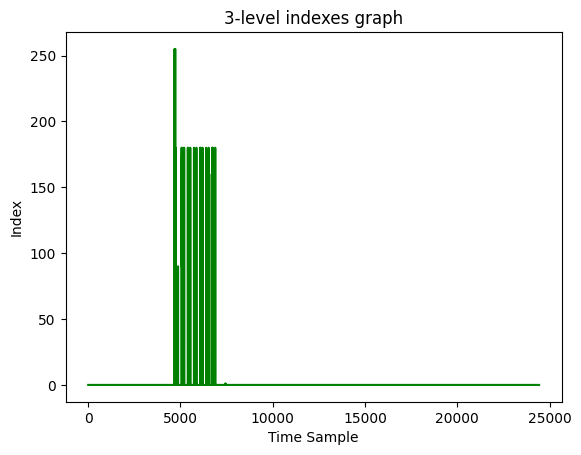

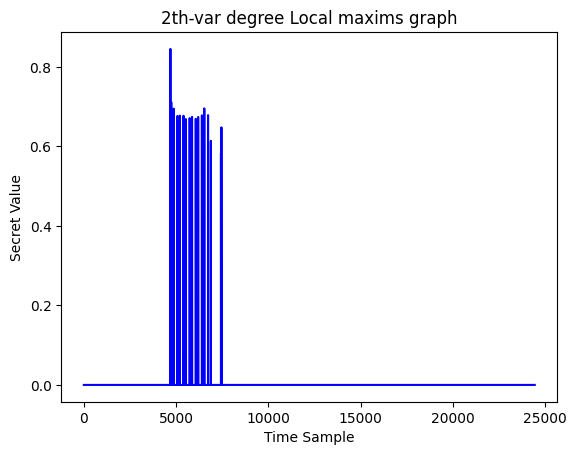

Number of uniques: 4
Number of local maxims: 19
Uniquess: [1, 90, 45, 180]
Local maxims: [1, 1, 90, 45, 90, 90, 180, 90, 90, 90, 180, 90, 180, 90, 90, 180, 180, 1, 1]


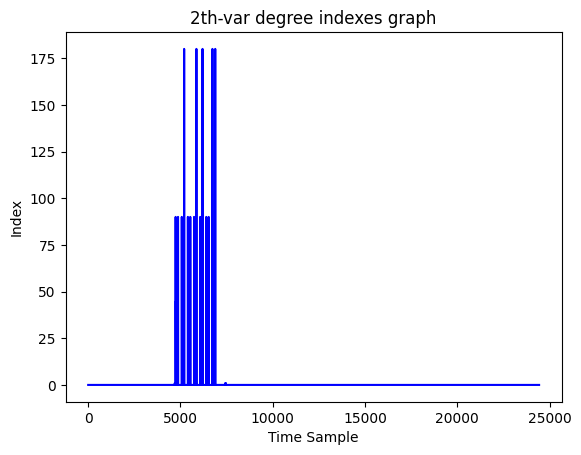

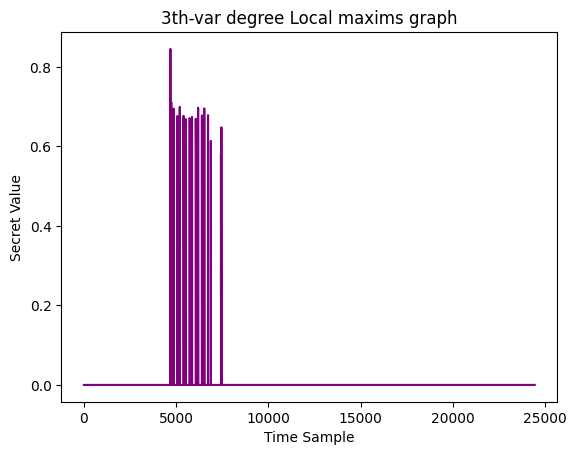

Number of uniques: 6
Number of local maxims: 62
Uniquess: [255, 1, 180, 90, 45, 173]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 1, 255, 180, 90, 90, 90, 180, 45, 90, 90, 90, 90, 173, 180, 90, 180, 90, 90, 90, 90, 90, 90, 180, 90, 90, 90, 90, 90, 180, 90, 90, 90, 90, 90, 90, 180, 180, 180, 90, 90, 90, 90, 90, 90, 180, 180, 90, 90, 180, 180, 180, 1, 1, 1]


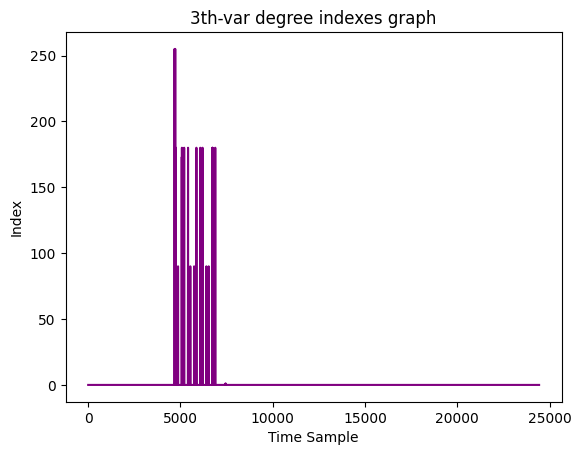

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4690, with correlation secret_corr = 0.845


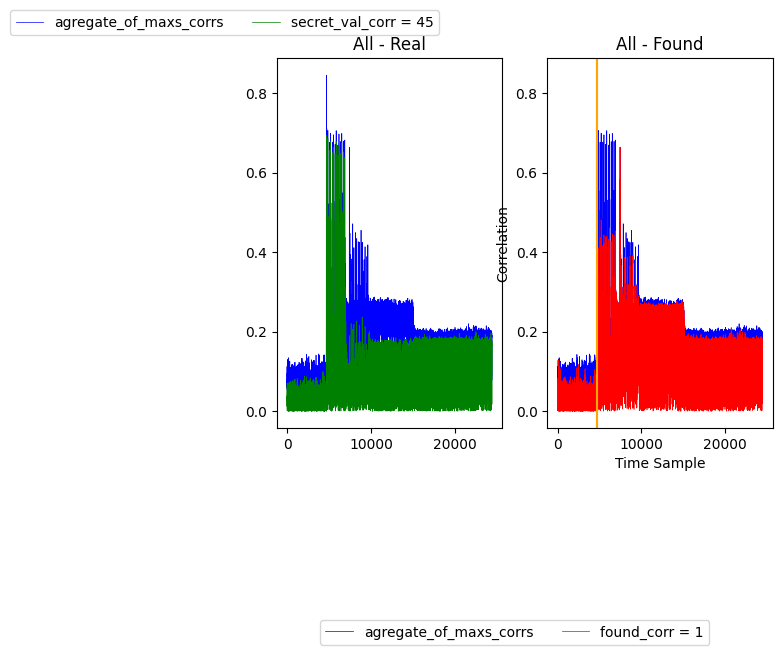

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 1, at the time sample 4714, with correlation secret_corr = 0.704


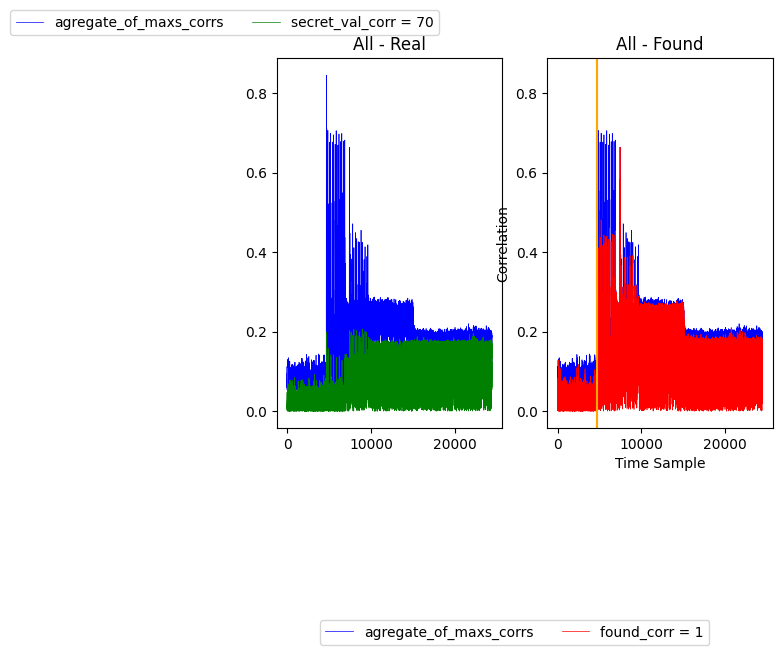

Hello 4
In range 4725 - 24429
 Found the soonest secret value is 90, at the time sample 4737, with correlation secret_corr = 0.711


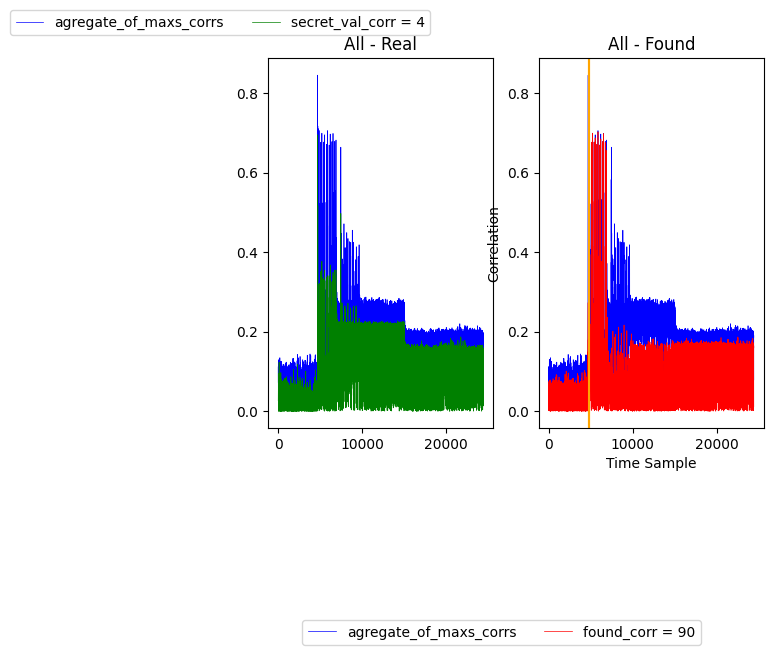

Hello 120
In range 4746 - 24429
 Found the soonest secret value is 45, at the time sample 4754, with correlation secret_corr = 0.558


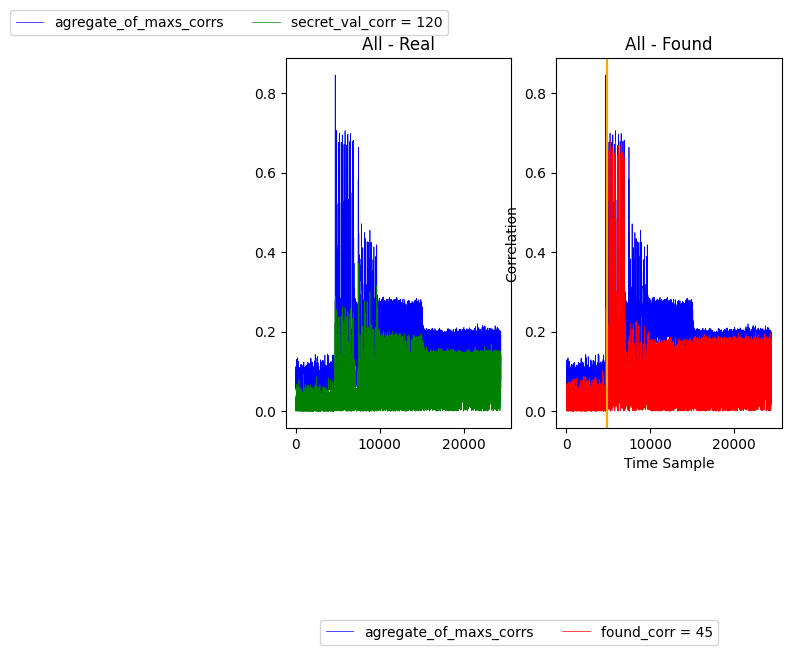

Hello 104
In range 4810 - 24429
 Found the soonest secret value is 90, at the time sample 4866, with correlation secret_corr = 0.695


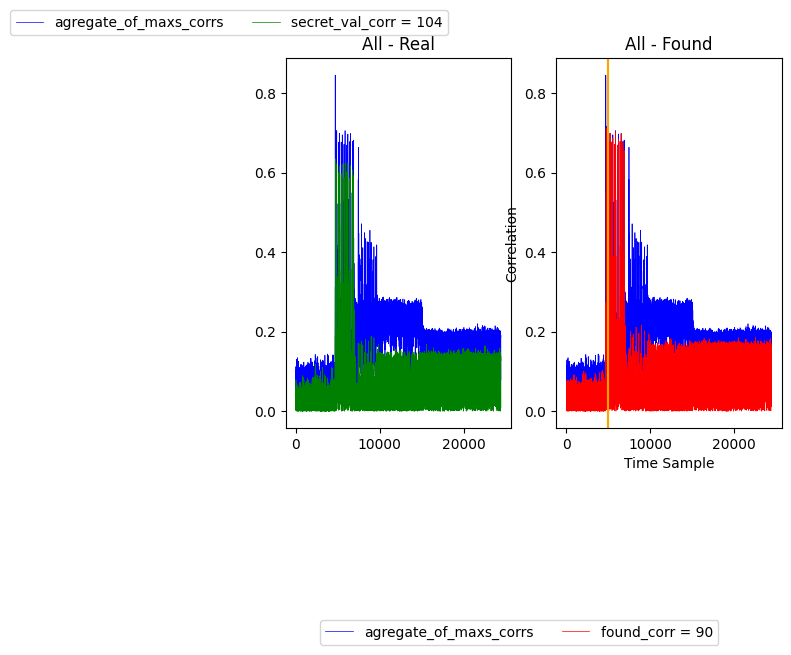

Hello 255
In range 4968 - 24429
 Found the soonest secret value is 90, at the time sample 5070, with correlation secret_corr = 0.676


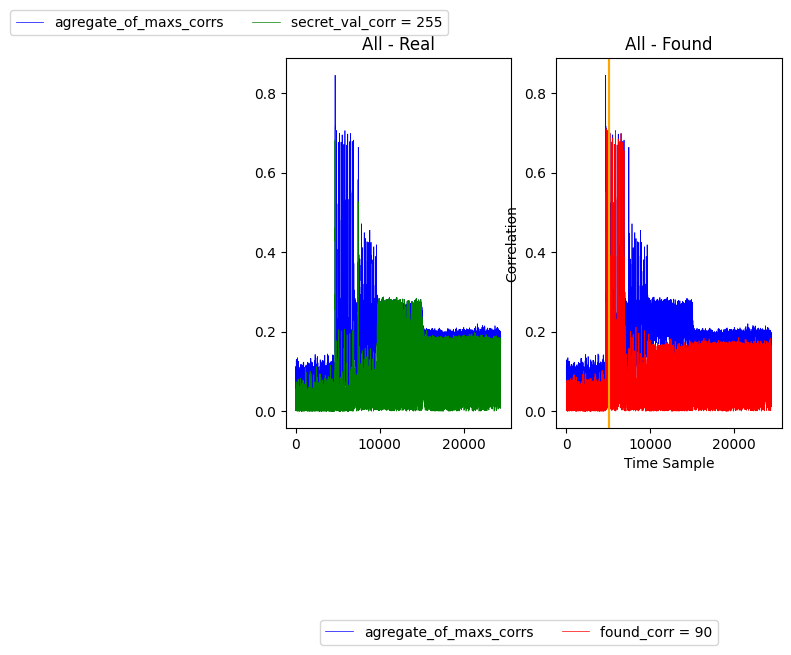

Hello 43
In range 5134 - 24429
 Found the soonest secret value is 180, at the time sample 5198, with correlation secret_corr = 0.677


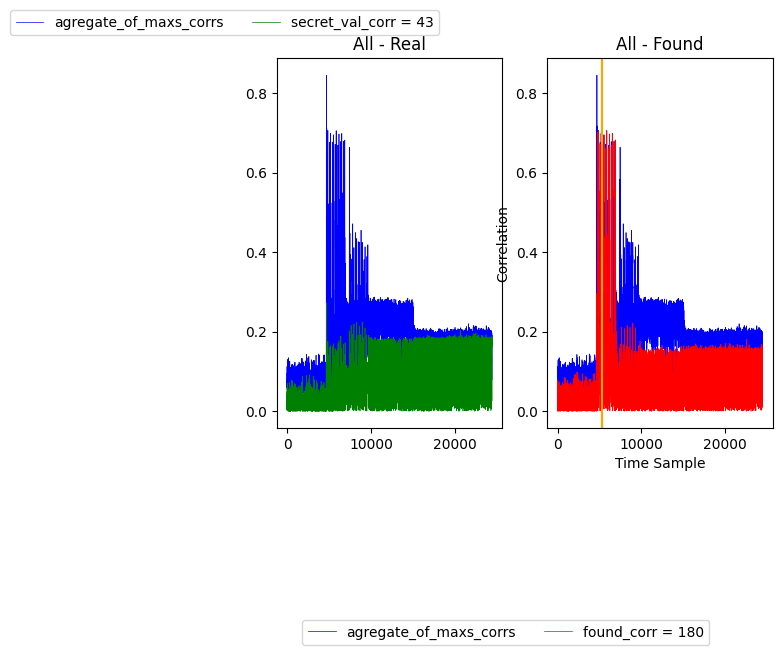

Hello 0
In range 5299 - 24429
 Found the soonest secret value is 90, at the time sample 5401, with correlation secret_corr = 0.677


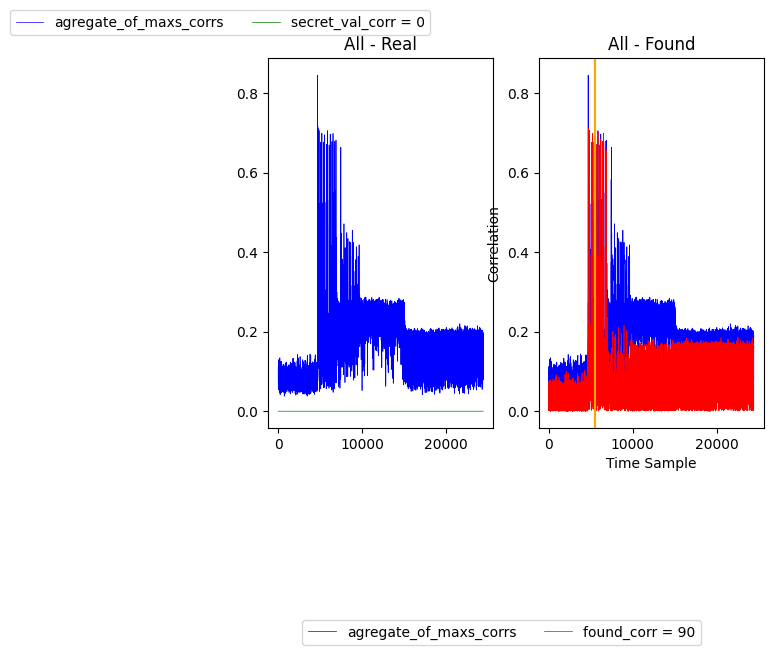

Hello 207
In range 5466 - 24429
 Found the soonest secret value is 90, at the time sample 5530, with correlation secret_corr = 0.669


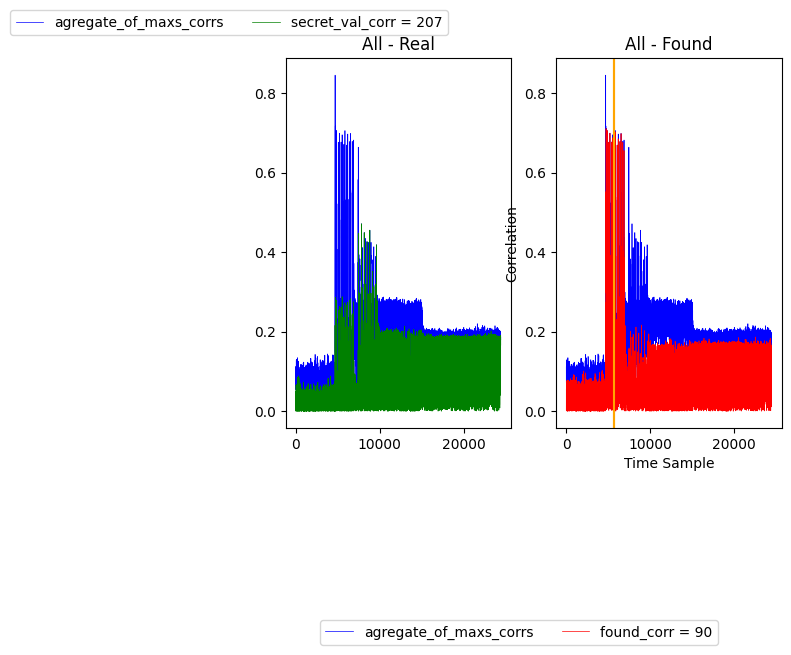

Hello 41
In range 5632 - 24429
 Found the soonest secret value is 90, at the time sample 5734, with correlation secret_corr = 0.671


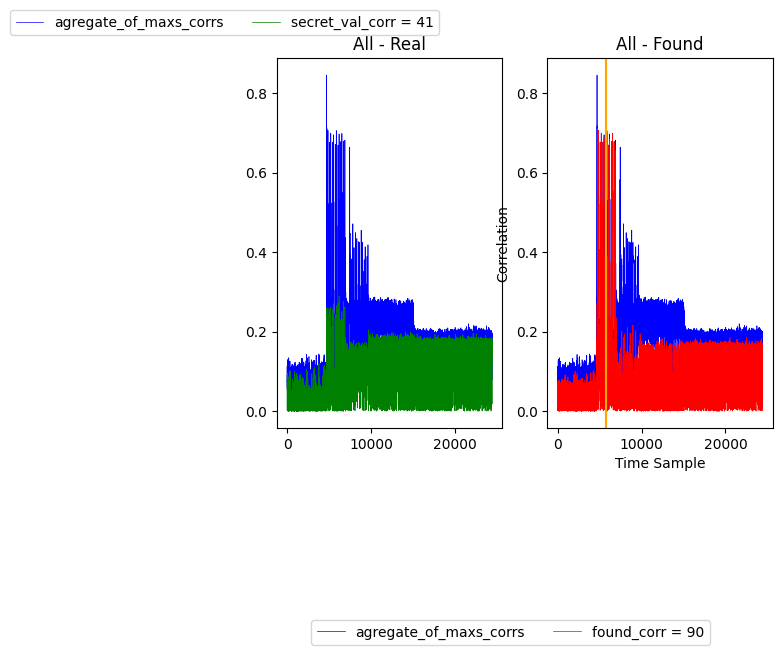

Hello 180
In range 5798 - 24429
 Found the soonest secret value is 180, at the time sample 5862, with correlation secret_corr = 0.674


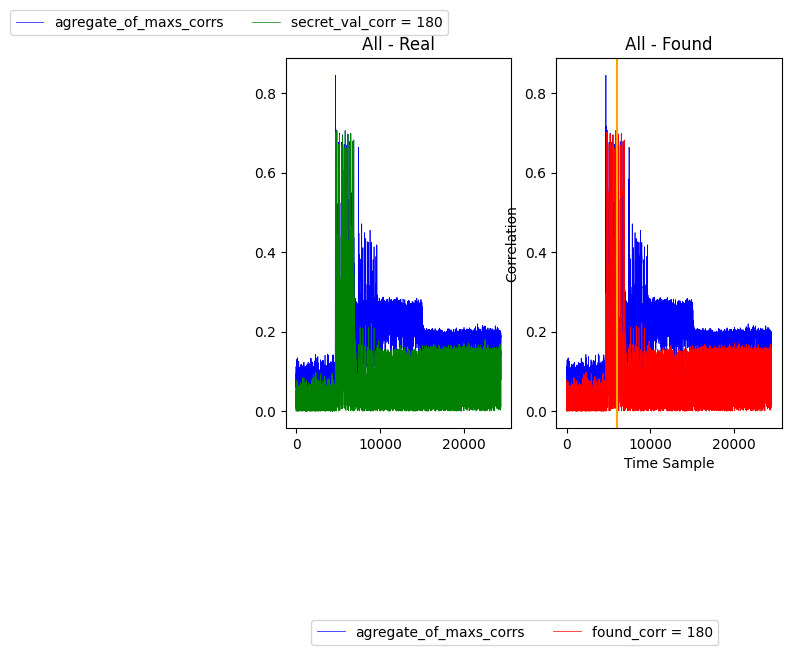

Hello 216
In range 5963 - 24429
 Found the soonest secret value is 90, at the time sample 6065, with correlation secret_corr = 0.669


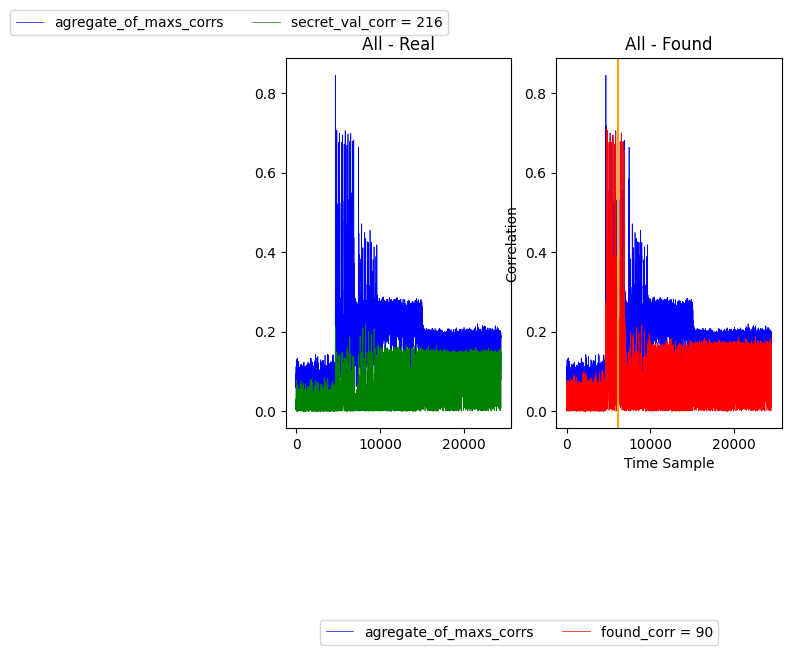

In [13]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 